# Motivation:
- COVID-19 is a pandemic that originated from Wuhan City in China and now has spread across the world. It has crippled the world economy and has swept across the world at such a pace that it has infected about 4.2 million people and about 280,000 people have died because of it.
- Since, the first case recorded in China, different countries have and are still batteling with it by enforcing strict measures and doing whatever they can. Some countries like United States, Japan and United Kingdom which have one of the best healthcare systems in the world and are leaders in economy are dealing with it in certain ways, while other countries like Pakistan or Mexico, which are not established economicaly and don't have adequate healthcare systems are dealing with it in their own ways.
- However, my idea was to see if despite all these Economic Conditions, Healthcare system and strategic planning etc., do "climatic Conditions" have any effect (Contributing Factor) on the Spread of COVID-19 cases. E.g does High temperature or low humidity slow down the spread od COVID-19 or help it.
- But analyzing this effect is not that easy because different countries have different conditions and their own ways of handling the COVID-19 situation, as mentioned above. So, pointing out the effect of Climatic Conditions on the Spread of COVID-19 woud take some strategic  thinking and analytical rigor.

Let me first explain the dataset i gathered and then i will explain the strategy about analyzing the effect of "climatic Conditions" on the spread of COVID-19 without any bias of other Economic or Heathcare conditions of country.

All the Analysis is done using "R Programming Language" so all the statistical testing, experimental design and visualizations you will see in this report are performed using R.

# Installing Essential Libraries and Packages in R:

In [1]:
options(warn=-1)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(readxl)
library(reshape)
library(reshape2)
library(gridExtra)
library(hrbrthemes)
library(car)
library(lubridate)
"%notin%"=Negate("%in%")

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.4
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'reshape'


The following object is masked from 'package:dplyr':

    rename


The following objects are masked from 'package:tidyr':

    expand, smiths



Attaching package: 'reshape2'


The following objects are masked from 'package:reshape':

    colsplit, melt, recast


The following object is masked from 'package:tidyr':

    smiths



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to inst

# Climatic Conditions Data:
As mentioned above i want to analyze the effect of climatic conditions on the spread of COVID-19. So, i gathered the data for climatic conditions of 15 countries, which included Max, Min and Avg values per day for Temperature, Humidity and Wind.
As regions in only one country have different climates so, my idea was to select one city from each of the country and collect per day data of Climatic conditions and Number of Cases till that day for that.
- Countries i selected for my analysis are [Country(Selected City Name)]:
1. Israel (Tel Aviv)
2. Pakistan (Karachi)
3. Japan (Tokyo)
4. Malaysia (Petaling Jaya)
5. Iran (Tehran)
6. Switzerland (Geneva)
7. Italy (Lombardy)
8. Spain (Madrid)
9. France (Ile De France)
10. Germany (Berlin)
11. Panama
12. Canada (Toronto)
13. Mexico (State of Mexico)
14. USA (New York)
15. Dominican Republic

In [373]:
climatic_condition_data=read_excel("C:/Users/Muhammad Hussain/Desktop/temperature_files_covid_new.xlsx")

In [374]:
# Just Taking the Country Name and removing the City Name from the data:

for(i in 1:dim(climatic_condition_data)[1]){
    country=climatic_condition_data$Country[i]
    country=strsplit(country,' ()')
    if(country[[1]][[1]]=='Dominician'){
        climatic_condition_data$Country[i]='Dominican Republic'
    }else if(country[[1]][[1]]=='Itlay'){
        climatic_condition_data$Country[i]='Italy'
    }else if(country[[1]][[1]]=='Tehran'){
        climatic_condition_data$Country[i]='Iran'
    }else if(country[[1]][[1]]=='Berlin'){
        climatic_condition_data$Country[i]='Germany'
    }else{
        climatic_condition_data$Country[i]=country[[1]][[1]]
    } 
}


In [375]:
colnames(climatic_condition_data)<- c('date','min_temp','max_temp','avg_temp','min_wind','max_wind','avg_wind',
                                     'min_humidity','max_humidity','avg_humidity','country')

In [370]:
head(climatic_condition_data)


date,min_temp,max_temp,avg_temp,min_wind,max_wind,avg_wind,min_humidity,max_humidity,avg_humidity,country,day,month,week_of_month
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
2020-03-01,13,18,15.5,10,32,21.0,61,78,69.5,Israel,1,3,1
2020-03-02,11,19,15.0,6,15,10.5,52,82,67.0,Israel,2,3,1
2020-03-03,9,22,15.5,4,13,8.5,56,86,71.0,Israel,3,3,1
2020-03-04,10,25,17.5,4,14,9.0,54,90,72.0,Israel,4,3,1
2020-03-05,11,30,20.5,4,18,11.0,24,88,56.0,Israel,5,3,1
2020-03-06,12,18,15.0,6,29,17.5,70,85,77.5,Israel,6,3,1


# Strategy For Analysis:
- The main idea behind this analysis is that we want to analyze the effect of climatic conditions on the spread of Covid_19. To do that we have collected data on One "City" representing a "Country", (Considering the city that has the most cases in that "Country"), the data includes the "Cummulative Count Covid Cases Each Day" along with the climatic conditions for that "City". So, as i explained that the we just considered one city from each country, so from now on i would just refer to that city with its country name.

- So, the motivation here is to see along with other factors like "Demographics, Health Conditions, Sanctions, Country's Economic Conditions, etc", does climatic conditions help the spread or slow it down or just doesn't have any effect on the spread.

- For analysis i considered "New Covid Cases Recorded Each Day", as this would give us better oversight of the spread. 

- To do that my idea is that we would cluster countries on the basis of climatic conditions, such that countries with similar climatic conditions would be in one cluster, and then we would see if there is any significant difference in the distribution of "New Covid Cases Recorded Each Day" among different countries in that cluster. One important point to note is that countries are clustered on the basis of "Climatic Conditions" and not the other conditions like "Demographics, Health care and Economic conditions, etc". With that we have controlled for the Climatic Conditions Factor. Null Hypothesis would be that there is no significant difference in the distribution of "New Covid Cases Recorded Each Day", which would indicate that considering the same climatic conditions if the spread among "Countries with different "Demographics, Healthcare and Economic Conditions, etc" is the same and that means the climatic conditions do have correlation with the spread of the Covid Cases.

- Now, you might think what if there are 3 countries in a cluster and two of them (A&B) have the same Distribution of the spread of cases while the third(C) has very different distribution, what is it then? So, the answer is that as we mentioned along with other factors we want to see the effect of climatic conditions on the spread, so this means that for A&B the climatic conditions effect the spread and for "C" there are other factors like "Demographics(Many Old People) or Sanctions like there were for Iran till mid of March", Worse Health and Economic Conditions, etc." that has played vital role in the spread, that the effect of climatic conditions have been shadowed by them. (This would be explained better when we further perform different experiments).

# Clustering Based on Climatic Conditions:
Since most of countries had the spread of COVID-19 starting in the month of march, it would be better if we just do the analysis for all the countries starting from March, 01, 2020.

Data Preparation for Clustering Analysis:
---
We want to perform clustering based on climatic conditions and we want to cluster 15 countries into some similar set of distinct groups. As, the climatic conditions change pretty fast usually in weeks, e.g one week temperature is nominal in your city and the other week it would be very different , get hot or cold depending upon the month or season.
So, the idea is to bin the data and record weekly average statistics for climatic conditions for each country to be used as features in Clustering analysis.

Setting up the day and week of month column:
---

In [341]:
# Setting up the day and week of month column
climatic_condition_data$day=c(day(climatic_condition_data$date))
climatic_condition_data$month=c(month(climatic_condition_data$date))

In [342]:
climatic_condition_data=climatic_condition_data %>% filter(month==3)


In [343]:
week=c()
for(i in 1:length(climatic_condition_data$day)){
    day=climatic_condition_data$day[i]
    if(day<=7){
        week=c(week,1)
    }else if(day>7 & day<=14){
        week=c(week,2)
    }else if(day>14 & day<=21){
        week=c(week,3)
    }else{
        week=c(week,4)
    }
}
    
climatic_condition_data$week_of_month=week

Recording weekly Statistics for Climatic Conditions for different Countries:
---

In [344]:
dat_1<-climatic_condition_data %>% group_by(country,week_of_month) %>% summarise(avg_temp=mean(avg_temp),
                                                                avg_wind=mean(avg_wind),
                                                                avg_humidity=mean(avg_humidity))

temp=dat_1 %>% select(country,week_of_month,avg_temp) %>% dcast(country~week_of_month)
wind=dat_1 %>% select(country,week_of_month,avg_wind) %>% dcast(country~week_of_month)
humid=dat_1 %>% select(country,week_of_month,avg_humidity) %>% dcast(country~week_of_month)

final_dat=wind %>% inner_join(temp,by='country') %>% inner_join(humid,by='country')
colnames(final_dat)=c('country','avg_wind_w1','avg_wind_w2','avg_wind_w3','avg_wind_w4',
                'avg_temp_w1','avg_temp_w2','avg_temp_w3','avg_temp_w4',
               'avg_humidity_w1','avg_humidity_w2','avg_humidity_w3','avg_humidity_w4')

Using avg_temp as value column: use value.var to override.

Using avg_wind as value column: use value.var to override.

Using avg_humidity as value column: use value.var to override.



In [345]:
head(final_dat)

,country,avg_wind_w1,avg_wind_w2,avg_wind_w3,avg_wind_w4,avg_temp_w1,avg_temp_w2,avg_temp_w3,avg_temp_w4,avg_humidity_w1,avg_humidity_w2,avg_humidity_w3,avg_humidity_w4
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Canada,18.428571,21.571429,20.857143,19.20,0.7857143,4.857143,1.785714,4.900,72.21429,67.50000,63.14286,76.550
2,Dominican Republic,4.571429,4.142857,4.857143,3.00,26.1428571,25.428571,26.285714,26.250,78.71429,56.14286,63.64286,41.750
3,France,18.785714,18.571429,10.357143,24.00,5.7857143,8.928571,10.928571,6.750,84.00000,79.14286,74.42857,132.000
4,Germany,14.928571,20.071429,13.857143,11.75,5.2857143,6.785714,8.500000,1.750,80.14286,77.71429,63.35714,48.000
5,Iran,12.785714,11.714286,13.785714,12.00,10.6428571,14.214286,15.928571,11.375,45.57143,25.42857,37.07143,57.375
6,Israel,12.714286,14.714286,16.285714,8.25,16.3571429,18.714286,14.428571,15.500,69.92857,69.57143,75.00000,61.500


K-Means Clustering:
---
I performed K-Means Clustering on the data above and used Euclidean Distance as the distance metric for clustering. As, we don't know what number of clusters would be the most optimal, so i will use the elbow-joint technique to find that out.

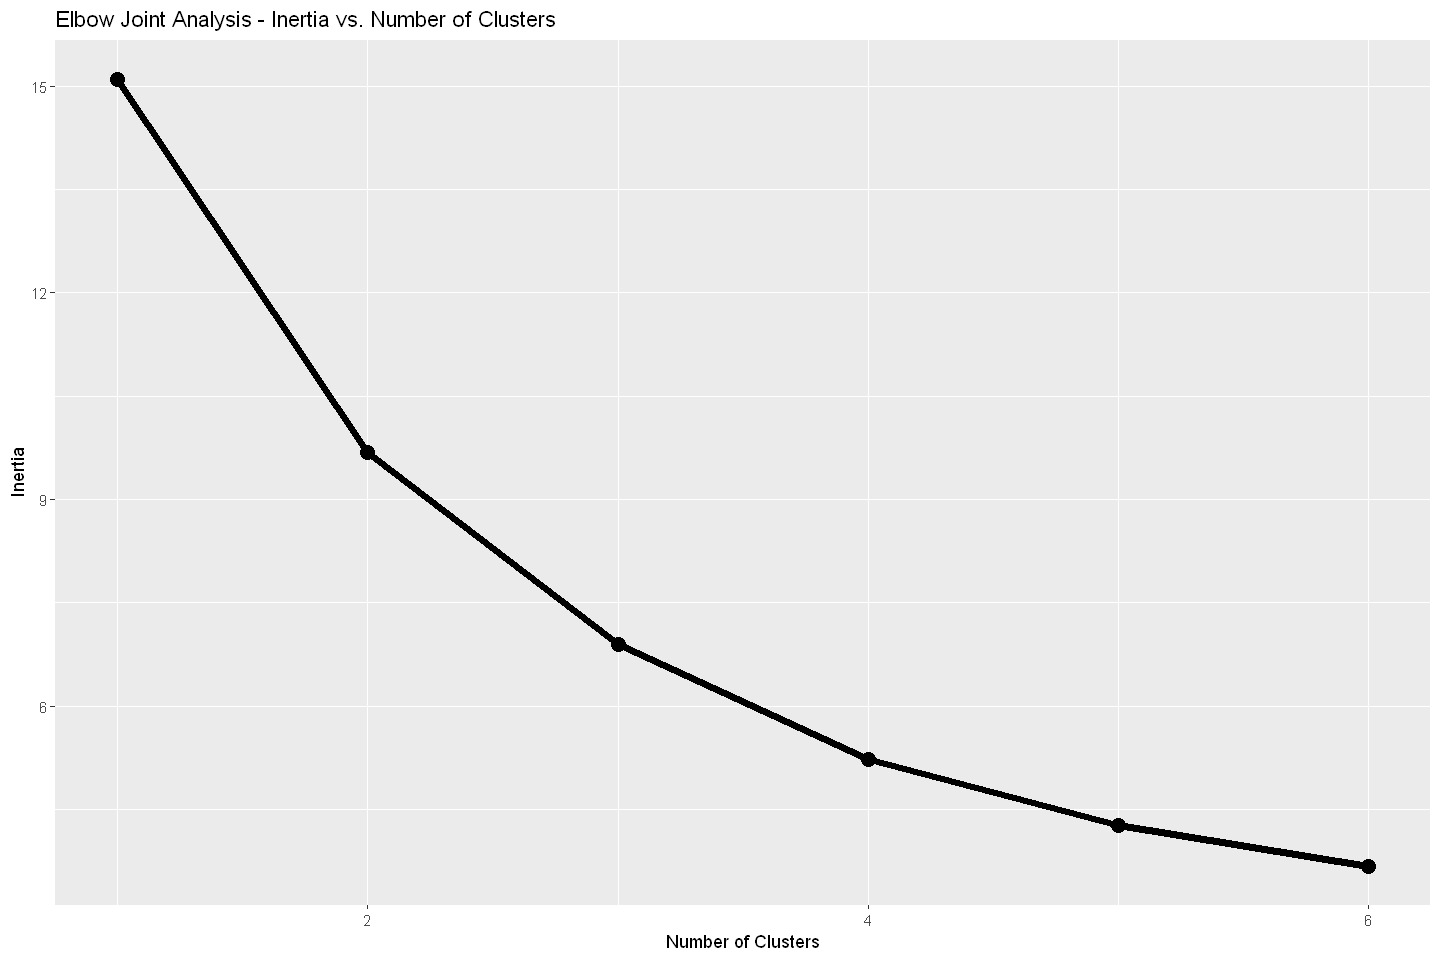

In [441]:
library(caret)
library(factoextra)
preproc=preProcess(final_dat[,-1],method='range')
clust_datu=predict(preproc,final_dat[,-1])

inertia=c()

for(num_clust in 1:6){
    kmm=kmeans(clust_datu,centers=num_clust)
    inertia=c(inertia,kmm$tot.withinss)
}


df=data.frame(clusters=1:6,inertia=inertia)
options(repr.plot.width=12, repr.plot.height=8)
ggplot(aes(x=clusters,y=inertia),data=df)+geom_line(col='black',size=2)+geom_point(col='black',size=4)+
labs(title='Elbow Joint Analysis - Inertia vs. Number of Clusters',
    x='Number of Clusters',y='Inertia')




It seems like No. of Clusters = 3, would be suitable for our analysis as also given by Elbow-Joint Analysis.

In [346]:
kmm=kmeans(centers=3,clust_datu)
cluster_label=kmm$cluster
country=final_dat$country

cluster_label_data=data.frame(cluster_label,country)
cluster_label_data

cluster_label,country
<int>,<fct>
1,Canada
3,Dominican Republic
1,France
1,Germany
2,Iran
1,Israel
1,Italy
1,Japan
3,Malaysia


# Covid Cases Dataset:
This is the complete dataset with climatic conditions and cumulative number of cases each day for different countries.
The data is being gathered for month of February and March till 23rd of March, 2020.

- Now as mentioned in the clustering analysis i am considering the cases and climatic conditions from March, 01, 2020 for all the countries. Now as the data has cumulative count of COVID-19 cases each day, you might be wondering how can we compare the two countries if one country already has 1000 cumulative cases on 1st March and the other just has 1 case. 
- This is the reason i engineered another feature and called it "Number of New Cases Added Each Day", this would eliminate the bias introduced by Cummulative cases variable.

In [347]:
# Dataset Loaded:
# dataset loaded:
final_covid_analysis_dataset <- read_excel("C:/Users/Muhammad Hussain/Desktop/covid_temp_cases_dataset.xlsx", 
                                           col_types = c("text", "text", 
                                                         "date", "numeric", "numeric", 
                                                         "numeric", "numeric", "numeric", 
                                                         "numeric", "numeric", "numeric", 
                                                         "numeric", "numeric", "numeric", 
                                                         "numeric", "numeric"))

In [348]:
# Dataset:
head(analysis_dataset)


state,country,date,confirmed_cases,month,day,min_temp,max_temp,avg_temp,min_wind,max_wind,avg_wind,min_humidity,max_humidity,avg_humidity,week,cases_that_day,labels
<chr>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Ontario,Canada,2020-03-01,15,3,1,-10,3,-3.5,4,32,18.0,44,79,61.5,1,15,1
Ontario,Canada,2020-03-02,18,3,2,1,7,4.0,7,22,14.5,60,100,80.0,1,3,1
Ontario,Canada,2020-03-03,20,3,3,1,4,2.5,4,26,15.0,75,100,87.5,1,2,1
Ontario,Canada,2020-03-04,20,3,4,1,5,3.0,13,43,28.0,60,87,73.5,1,0,1
Ontario,Canada,2020-03-05,22,3,5,-3,5,1.0,7,33,20.0,45,87,66.0,1,2,1
Ontario,Canada,2020-03-06,25,3,6,-1,2,0.5,7,30,18.5,64,100,82.0,1,3,1


Creating a feature that would give us "New Cases Recorded Each Day"
---

In [350]:
cases_that_day=c()

for(i in unique(final_covid_analysis_dataset$country)){
    prev_day_case=0
    ff=final_covid_analysis_dataset %>% filter(country==i) %>% select(confirmed_cases)
    for(j in ff$confirmed_cases){
        cases_that_day=c(cases_that_day,j-prev_day_case)
        prev_day_case=j
    }
}

final_covid_analysis_dataset$cases_that_day=cases_that_day

In [351]:
# labels of Clusters:
analysis_dataset=final_covid_analysis_dataset %>% inner_join(cluster_label_data,by='country') %>% filter(day!=23)

In [352]:
colnames(analysis_dataset)[18]<-'labels'

In [353]:
head(analysis_dataset)


state,country,date,confirmed_cases,month,day,min_temp,max_temp,avg_temp,min_wind,max_wind,avg_wind,min_humidity,max_humidity,avg_humidity,week,cases_that_day,labels
<chr>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Ontario,Canada,2020-03-01,15,3,1,-10,3,-3.5,4,32,18.0,44,79,61.5,1,15,1
Ontario,Canada,2020-03-02,18,3,2,1,7,4.0,7,22,14.5,60,100,80.0,1,3,1
Ontario,Canada,2020-03-03,20,3,3,1,4,2.5,4,26,15.0,75,100,87.5,1,2,1
Ontario,Canada,2020-03-04,20,3,4,1,5,3.0,13,43,28.0,60,87,73.5,1,0,1
Ontario,Canada,2020-03-05,22,3,5,-3,5,1.0,7,33,20.0,45,87,66.0,1,2,1
Ontario,Canada,2020-03-06,25,3,6,-1,2,0.5,7,30,18.5,64,100,82.0,1,3,1


# Preliminary Analysis:
The clustering has been performed and the new feature of "New Cases Added Eachday" has been produced. Our dataset is ready and now we can implement the strategy outlined above. But first step would be to perform some preliminary analysis.

Daily Climatic Conditions for Cluster 1 countries for the month of March:
---

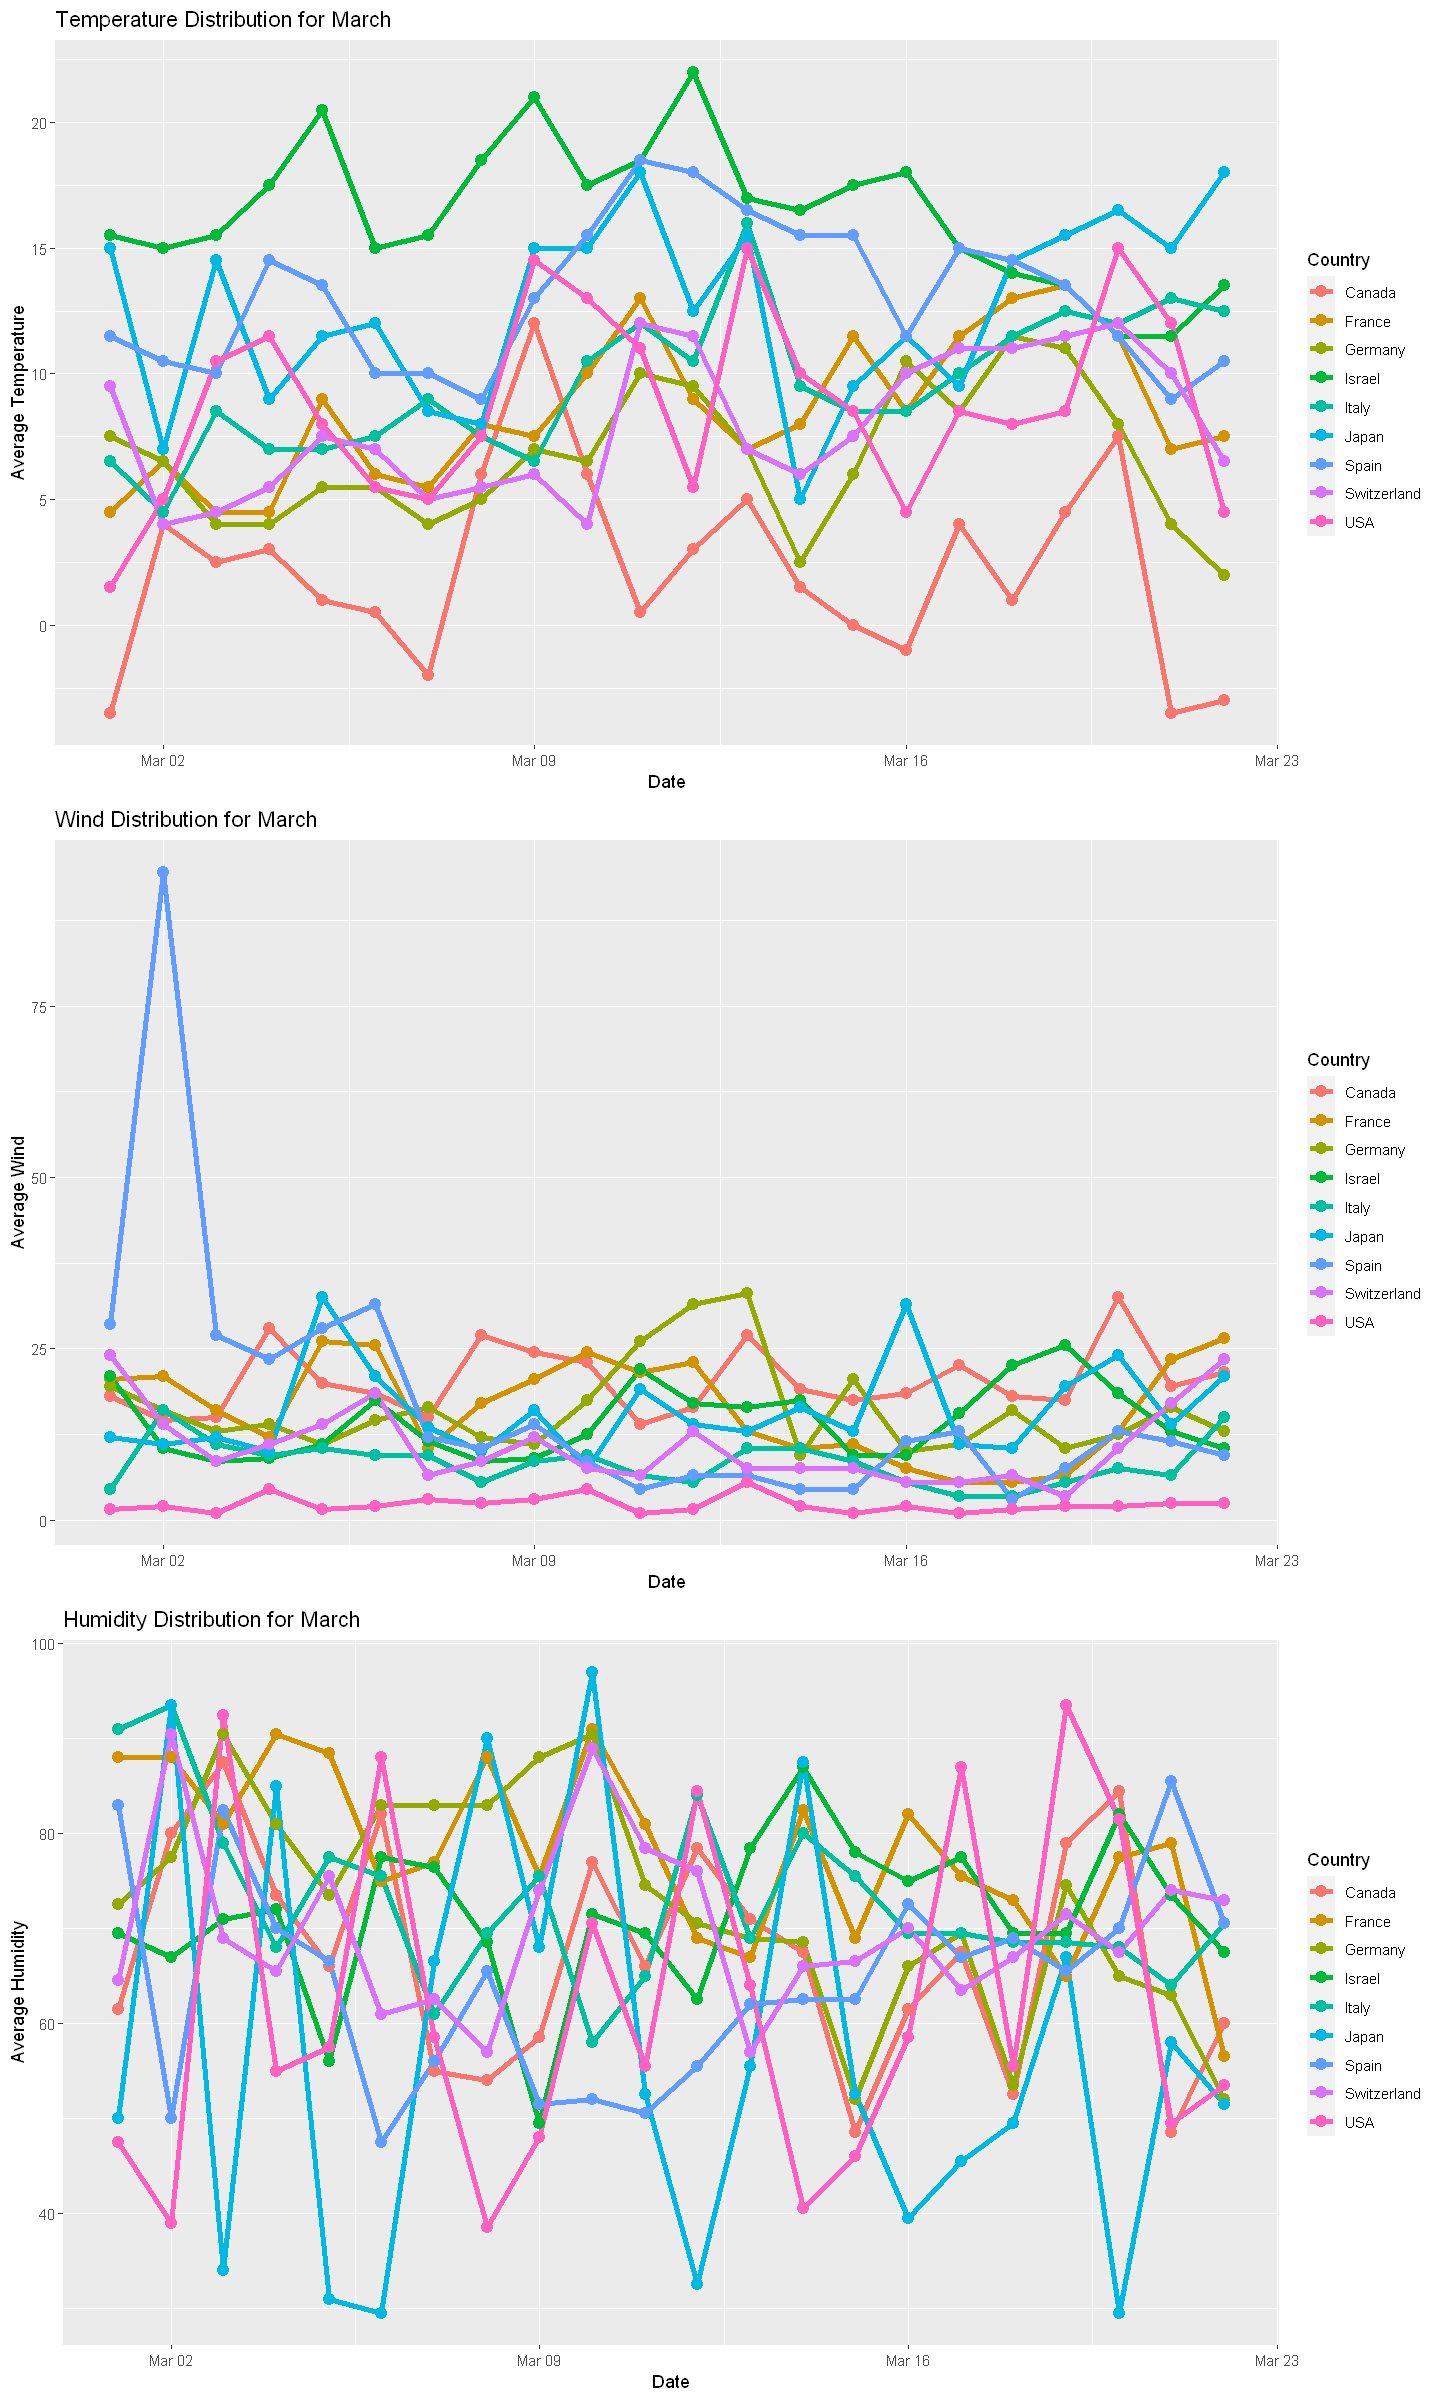

In [435]:
# Looking at the how temperature among different countries changed over th emonth of march.
options(repr.plot.width=12, repr.plot.height=20)
temp=ggplot(data=analysis_dataset %>% filter(labels==1),aes(y=avg_temp,x=date,col=country))+geom_line(size=1.5)+
geom_point(size=3)+labs(colour='Country',x='Date',y='Average Temperature',title='Temperature Distribution for March')

wind=ggplot(data=analysis_dataset %>% filter(labels==1),aes(y=avg_wind,x=date,col=country))+geom_line(size=1.5)+
geom_point(size=3)+labs(colour='Country',x='Date',y='Average Wind',title='Wind Distribution for March')

humid=ggplot(data=analysis_dataset %>% filter(labels==1),aes(y=avg_humidity,x=date,col=country))+geom_line(size=1.5)+
geom_point(size=3)+labs(colour='Country',x='Date',y='Average Humidity',title='Humidity Distribution for March')


grid.arrange(temp,wind,humid,ncol=1)

Daily Climatic Conditions for Cluster 2 countries for the month of March:
---

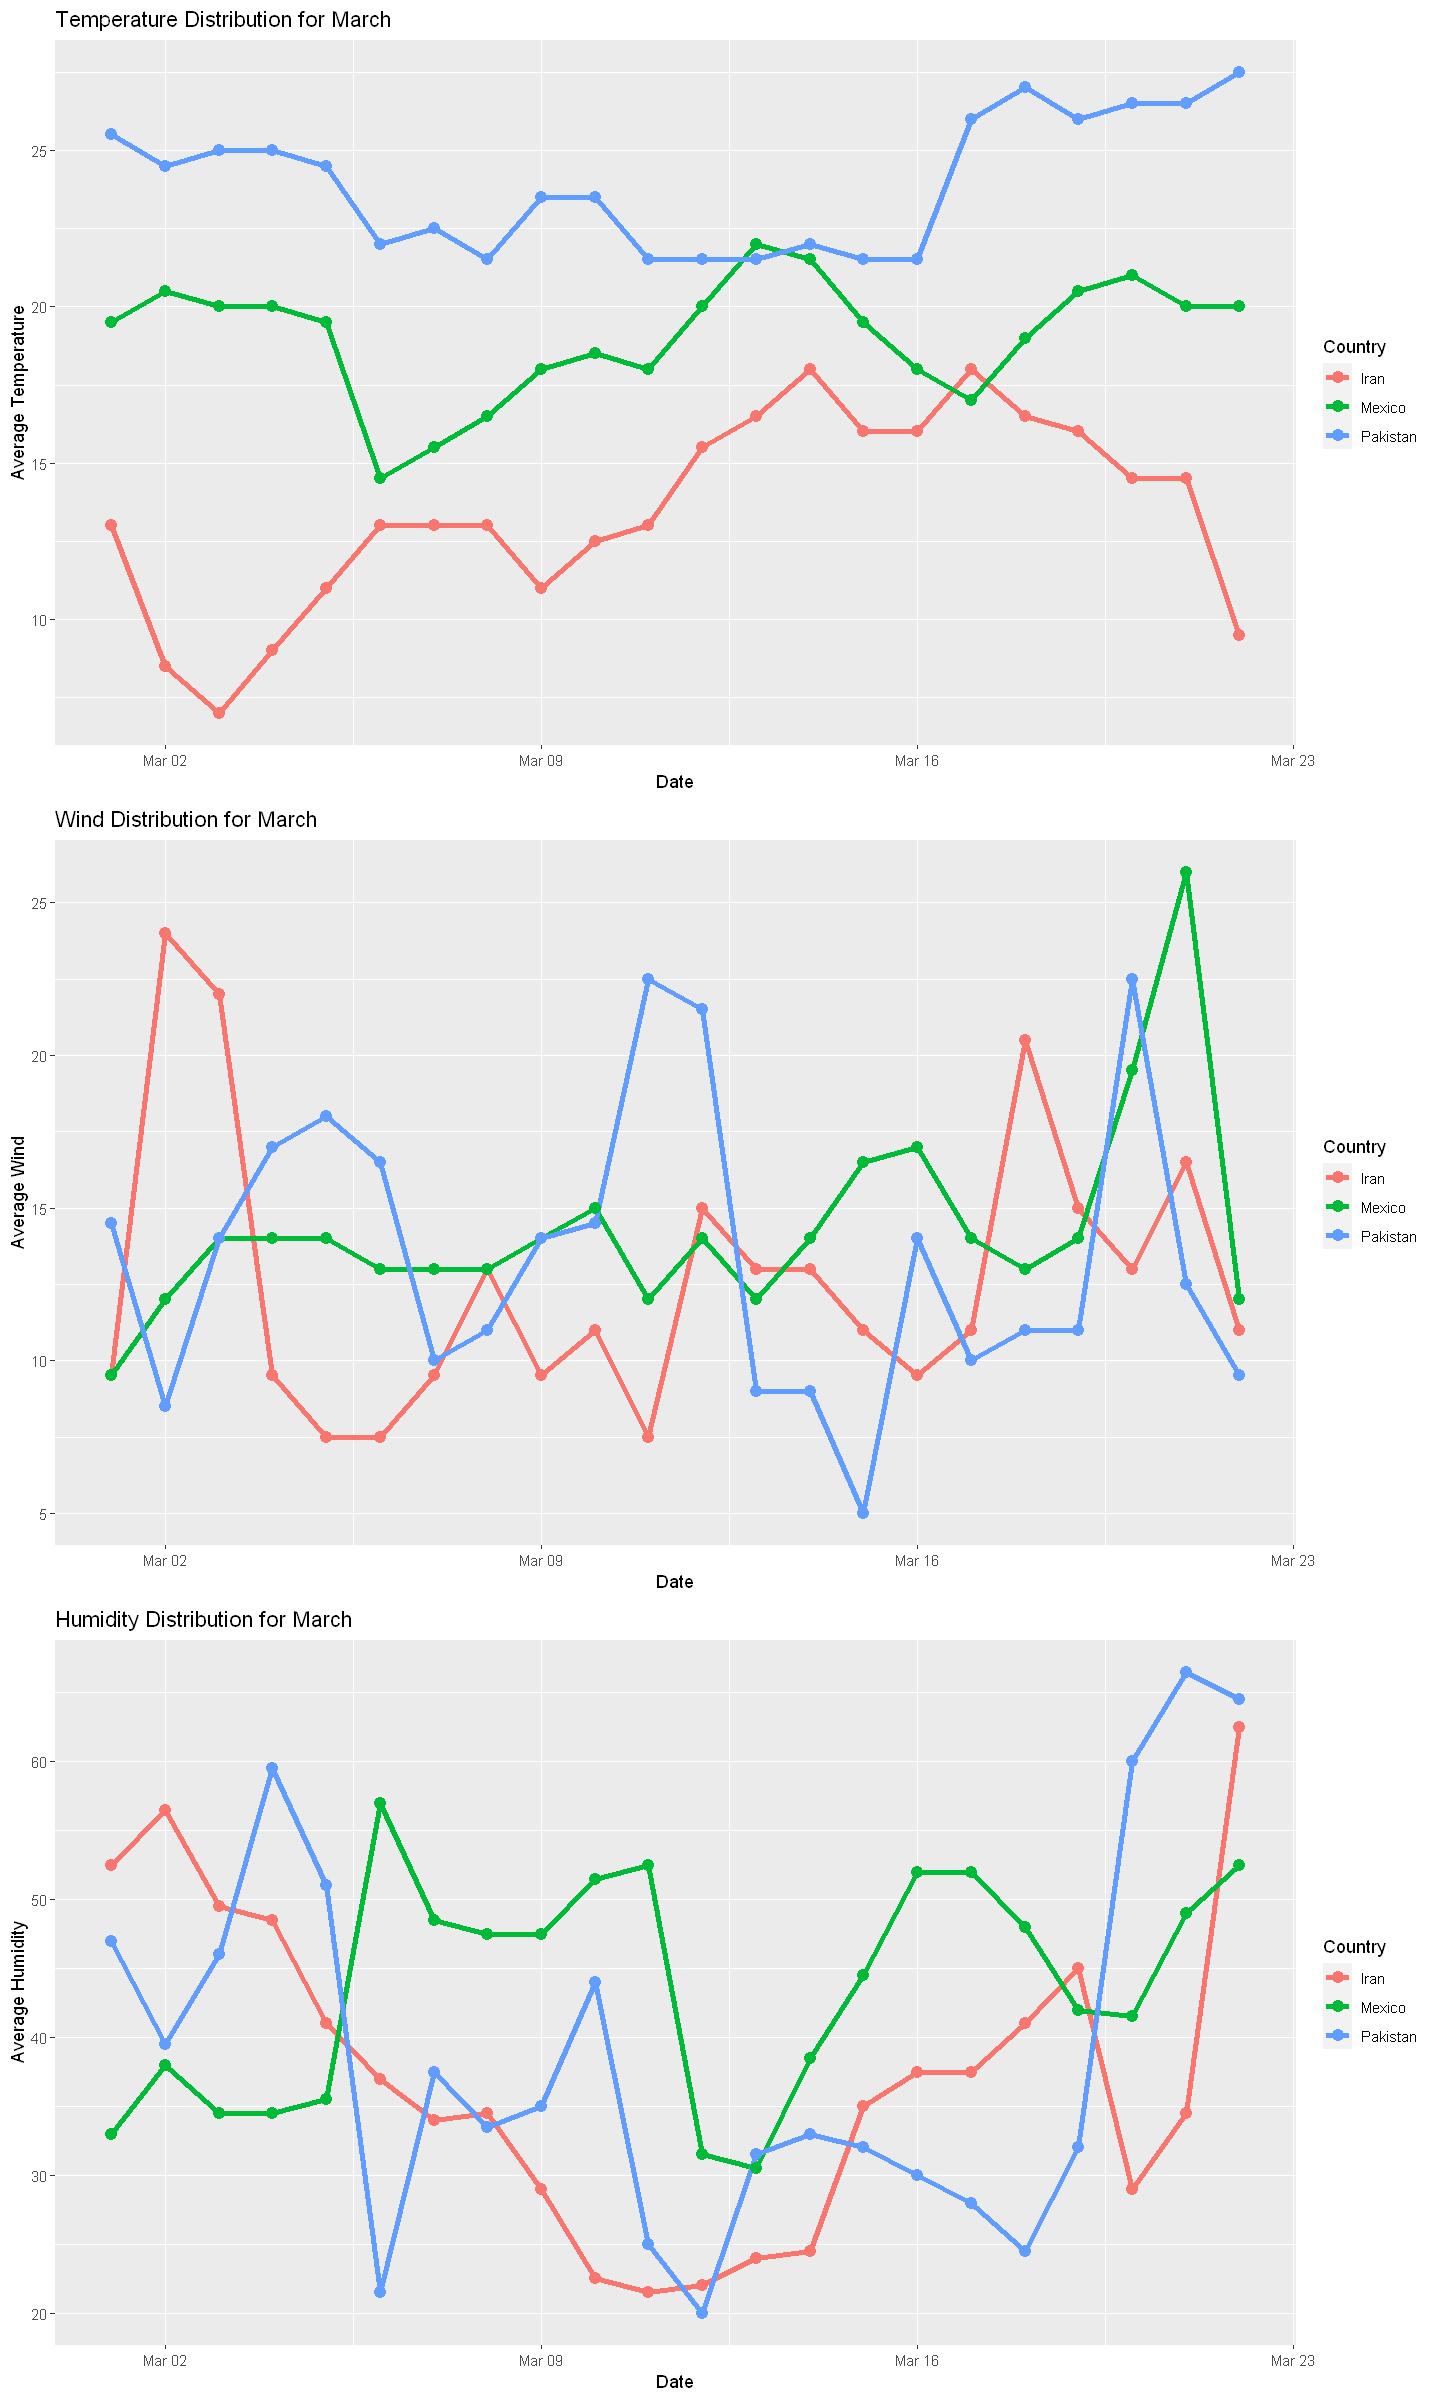

In [437]:
# Looking at the how temperature among different countries changed over the month of march.
options(repr.plot.width=12, repr.plot.height=20)
temp=ggplot(data=analysis_dataset %>% filter(labels==2),aes(y=avg_temp,x=date,col=country))+geom_line(size=1.5)+
geom_point(size=3)+labs(colour='Country',x='Date',y='Average Temperature',title='Temperature Distribution for March')

wind=ggplot(data=analysis_dataset %>% filter(labels==2),aes(y=avg_wind,x=date,col=country))+geom_line(size=1.5)+
geom_point(size=3)+labs(colour='Country',x='Date',y='Average Wind',title='Wind Distribution for March')

humid=ggplot(data=analysis_dataset %>% filter(labels==2),aes(y=avg_humidity,x=date,col=country))+geom_line(size=1.5)+
geom_point(size=3)+labs(colour='Country',x='Date',y='Average Humidity',title='Humidity Distribution for March')


grid.arrange(temp,wind,humid,ncol=1)

Daily Climatic Conditions for Cluster 3 countries for the month of March:
---

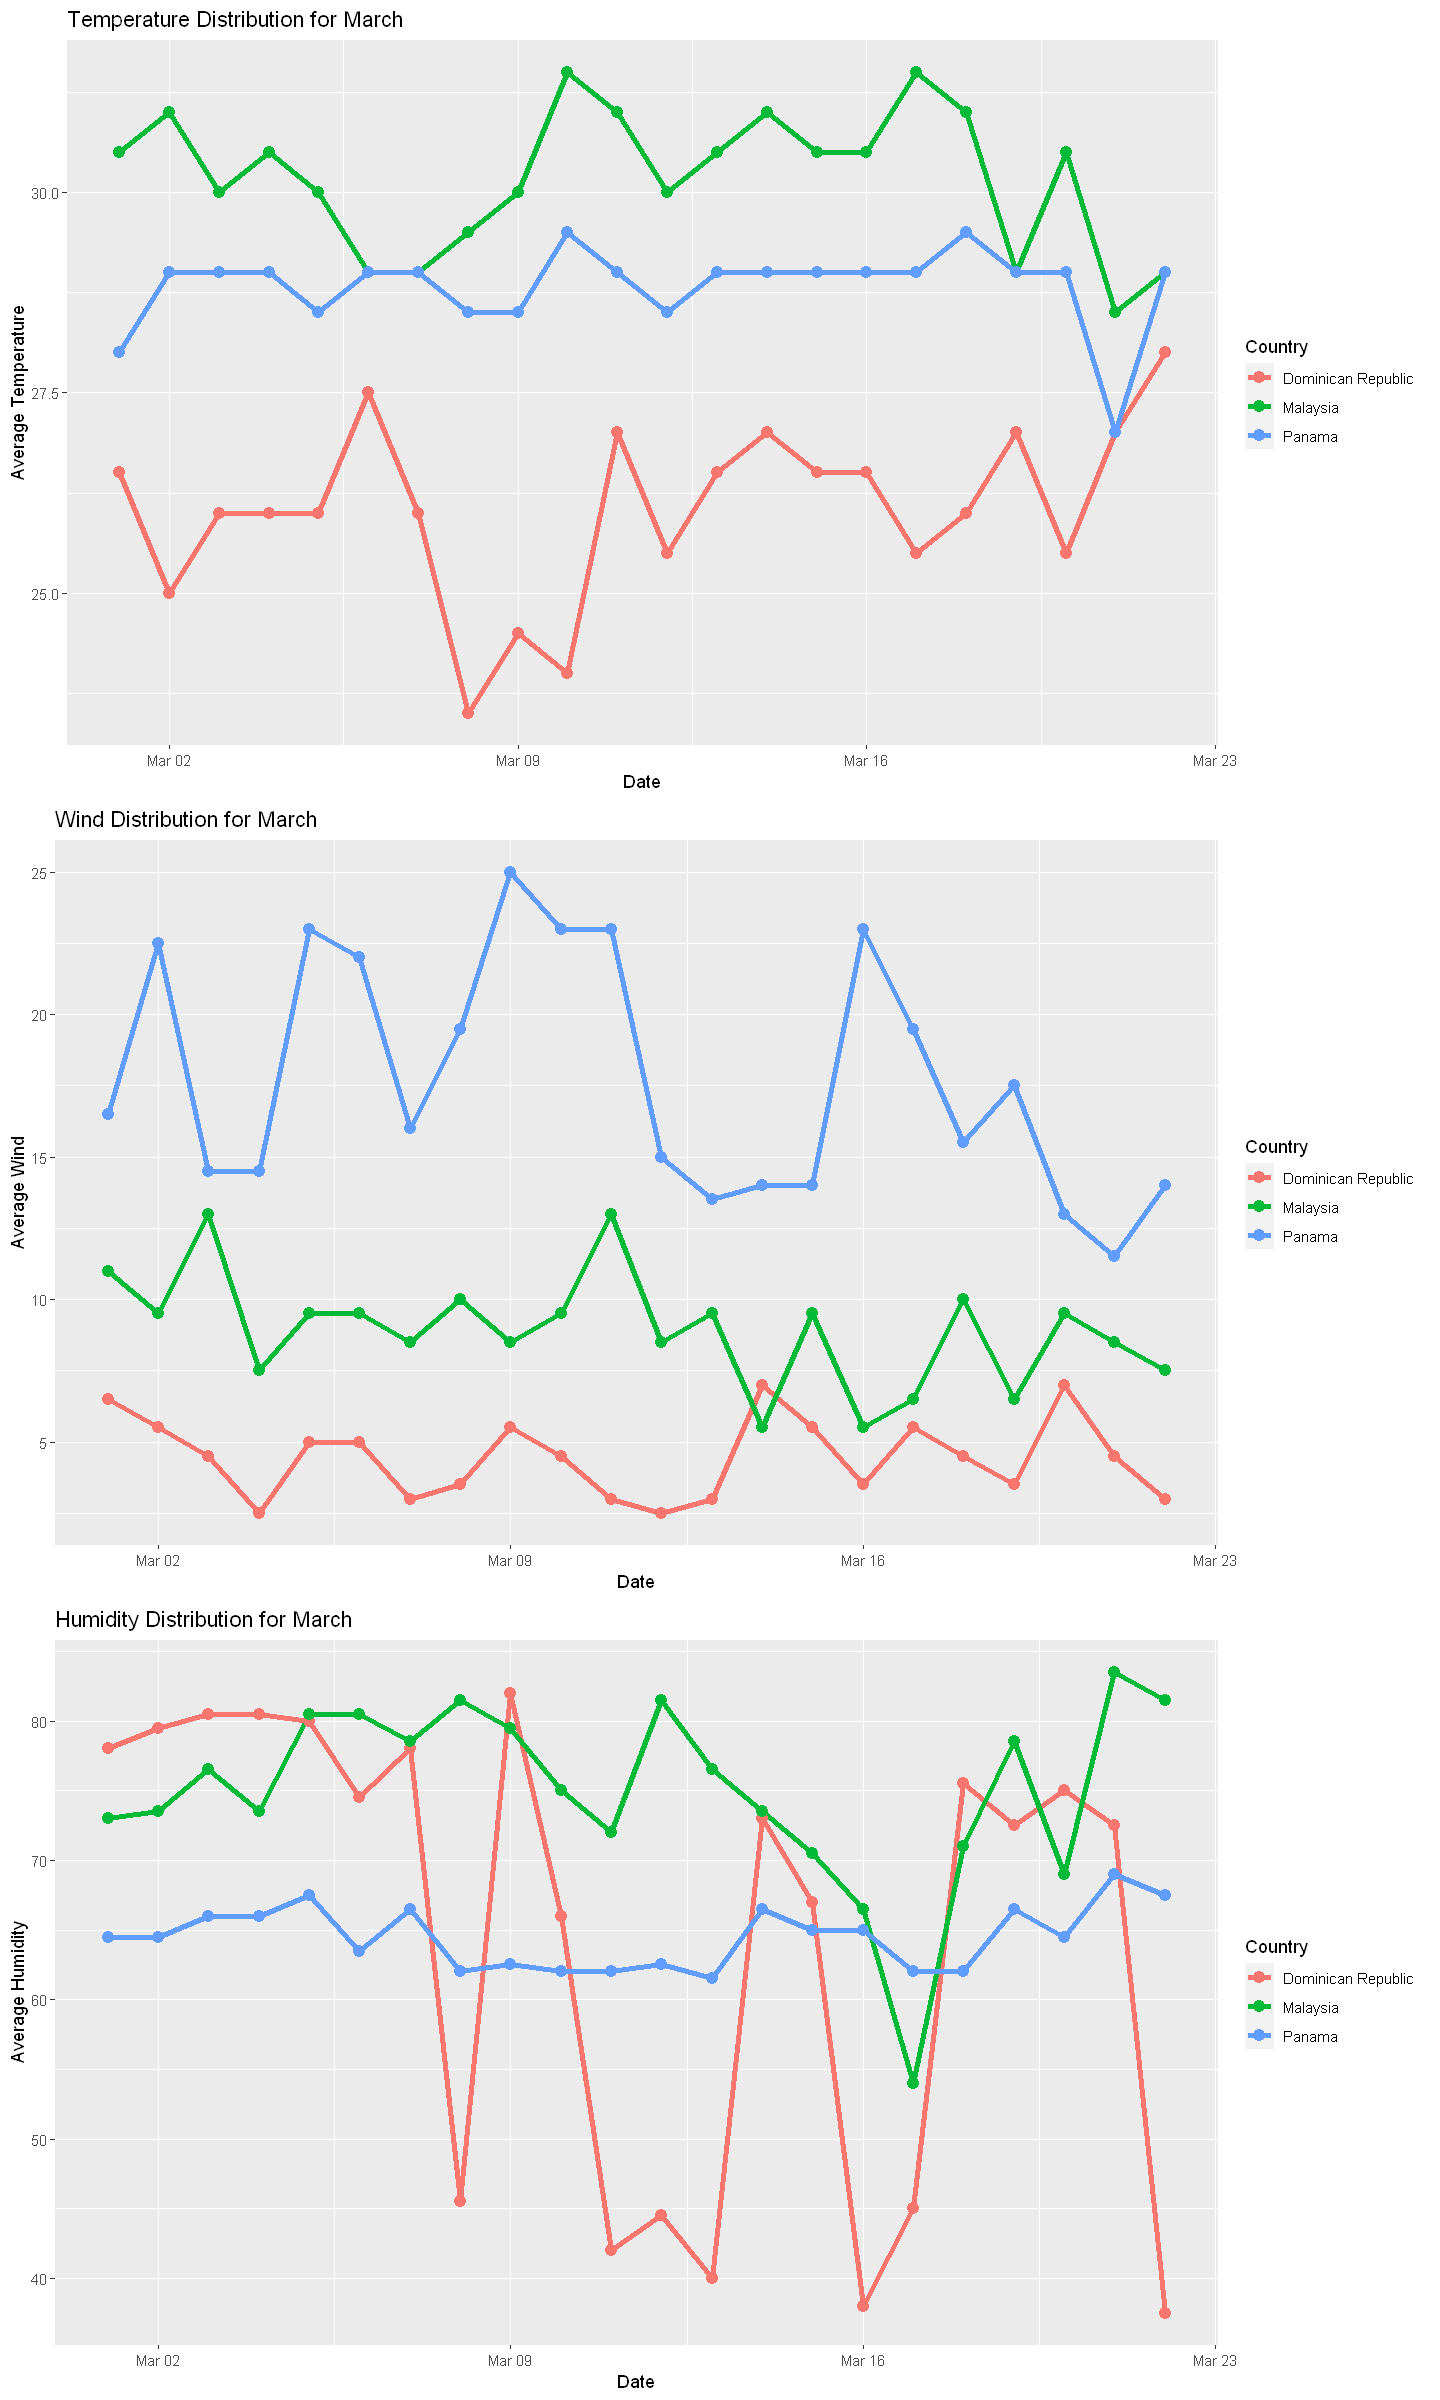

In [438]:
# Looking at the how temperature among different countries changed over the month of march.
options(repr.plot.width=12, repr.plot.height=20)
temp=ggplot(data=analysis_dataset %>% filter(labels==3),aes(y=avg_temp,x=date,col=country))+geom_line(size=1.5)+
geom_point(size=3)+labs(colour='Country',x='Date',y='Average Temperature',title='Temperature Distribution for March')

wind=ggplot(data=analysis_dataset %>% filter(labels==3),aes(y=avg_wind,x=date,col=country))+geom_line(size=1.5)+
geom_point(size=3)+labs(colour='Country',x='Date',y='Average Wind',title='Wind Distribution for March')

humid=ggplot(data=analysis_dataset %>% filter(labels==3),aes(y=avg_humidity,x=date,col=country))+geom_line(size=1.5)+
geom_point(size=3)+labs(colour='Country',x='Date',y='Average Humidity',title='Humidity Distribution for March')


grid.arrange(temp,wind,humid,ncol=1)

Comparison of Cases and Climatic Conditions for the 3 clusters:
---

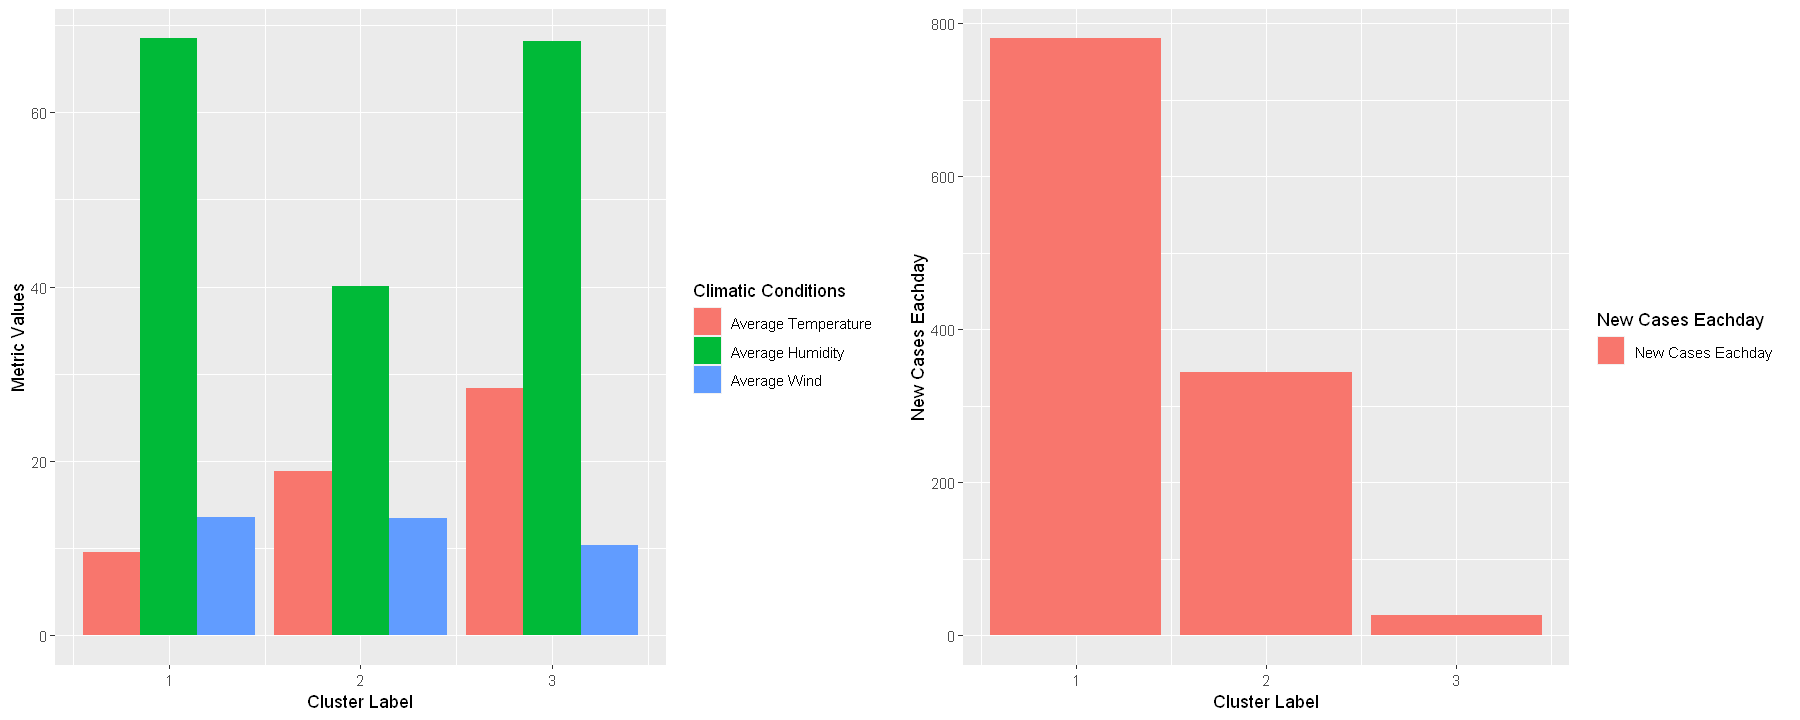

In [442]:
# Looking at the number of cases each day, among different clusters of Countries we made and the corrsponding climatic conditions.

plot_summary=analysis_dataset %>% group_by(labels) %>% summarise(avg_temp=mean(avg_temp),avg_humidity=mean(avg_humidity),
                                                   avg_wind=mean(avg_wind),
                                                                avg_cases_eachday=mean(cases_that_day)) %>%
melt(id='labels')
options(repr.plot.width=15, repr.plot.height=6)
g1=ggplot(plot_summary %>% filter(variable!='avg_cases_eachday'), aes(fill=variable, y=value, x=labels)) + 
    geom_bar(position="dodge", stat="identity") + 
labs(x='Cluster Label',y='Metric Values') +
scale_fill_discrete(name = "Climatic Conditions", labels = c("Average Temperature", "Average Humidity", "Average Wind"))

g2=ggplot(plot_summary %>% filter(variable=='avg_cases_eachday'), aes(fill=variable, y=value, x=labels)) + 
    geom_bar(position="dodge", stat="identity") +
labs(x='Cluster Label',y='New Cases Eachday')+
scale_fill_discrete(name = "New Cases Eachday", labels = c("New Cases Eachday"))


grid.arrange(g1,g2,ncol=2)

There seems to emerge a  pattern of spread and temperature. we can see where the avg temperatur is high, the number of cases eachday are less as compared to the clusters where temperature is low. This shows that temperature effects the spread negatively i.e reduces the spread of cases, but we need to dig a bit more into the data and different clusters to figure out the effect of different climatic conditions and not just the temperature. Also, there could be a case that effect of temperature on cases might be different among different clusters as they have completely different climatic conditions.

For example, in cluster 1 where average temperature is pretty low, the correlation of temperature with cases inside that cluster might be positive while for cluster 3 where average temperature is high, the correlation might be negative, so we can verify all these intuition by digging deeper and performing experimental analysis on clusters separately.

- Let's first see the boxplots to see the variance of cilmatic conditions w.r.t each cluster.

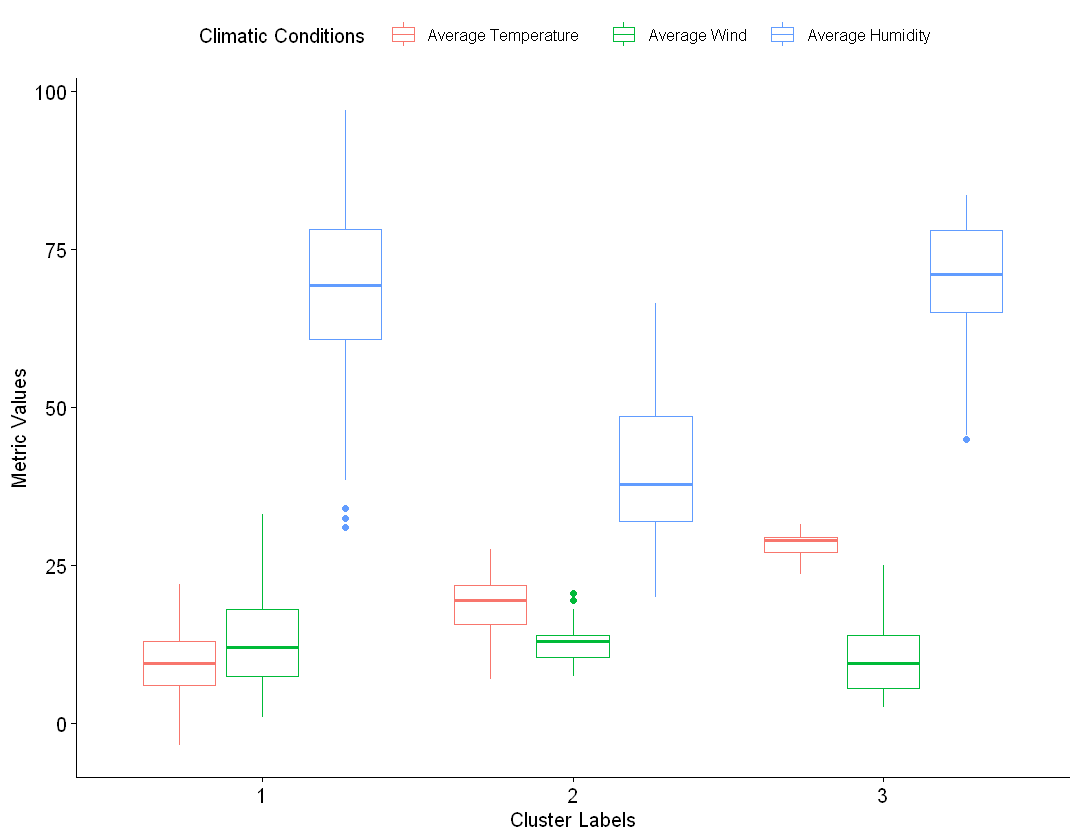

In [446]:
boxplot_data=analysis_dataset %>% select(labels,avg_temp,avg_wind,avg_humidity) %>% melt(id='labels') %>%
group_by(labels,variable) %>% 
filter((value>= quantile(value,0.25)-1.5*(IQR(value))) & (value<= quantile(value,0.75)+1.5*(IQR(value))))

options(repr.plot.width=9, repr.plot.height=7)
ggboxplot(boxplot_data,x='labels',y='value',color='variable') + labs(x='Cluster Labels',y='Metric Values')+ scale_color_discrete(name = "Climatic Conditions", labels = c("Average Temperature", "Average Wind", "Average Humidity"))

Seems like humidity has the most variance aong the other climatic conditions across all the three clusters.

Test for the corraltion between cases eachday with different climatic condition on all data, and then w.r.t each cluster label:
---

- Correlation Test for Cases Eachday with climatic condition for all countries irrespective of the cluster label, just to see the primary pattern.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



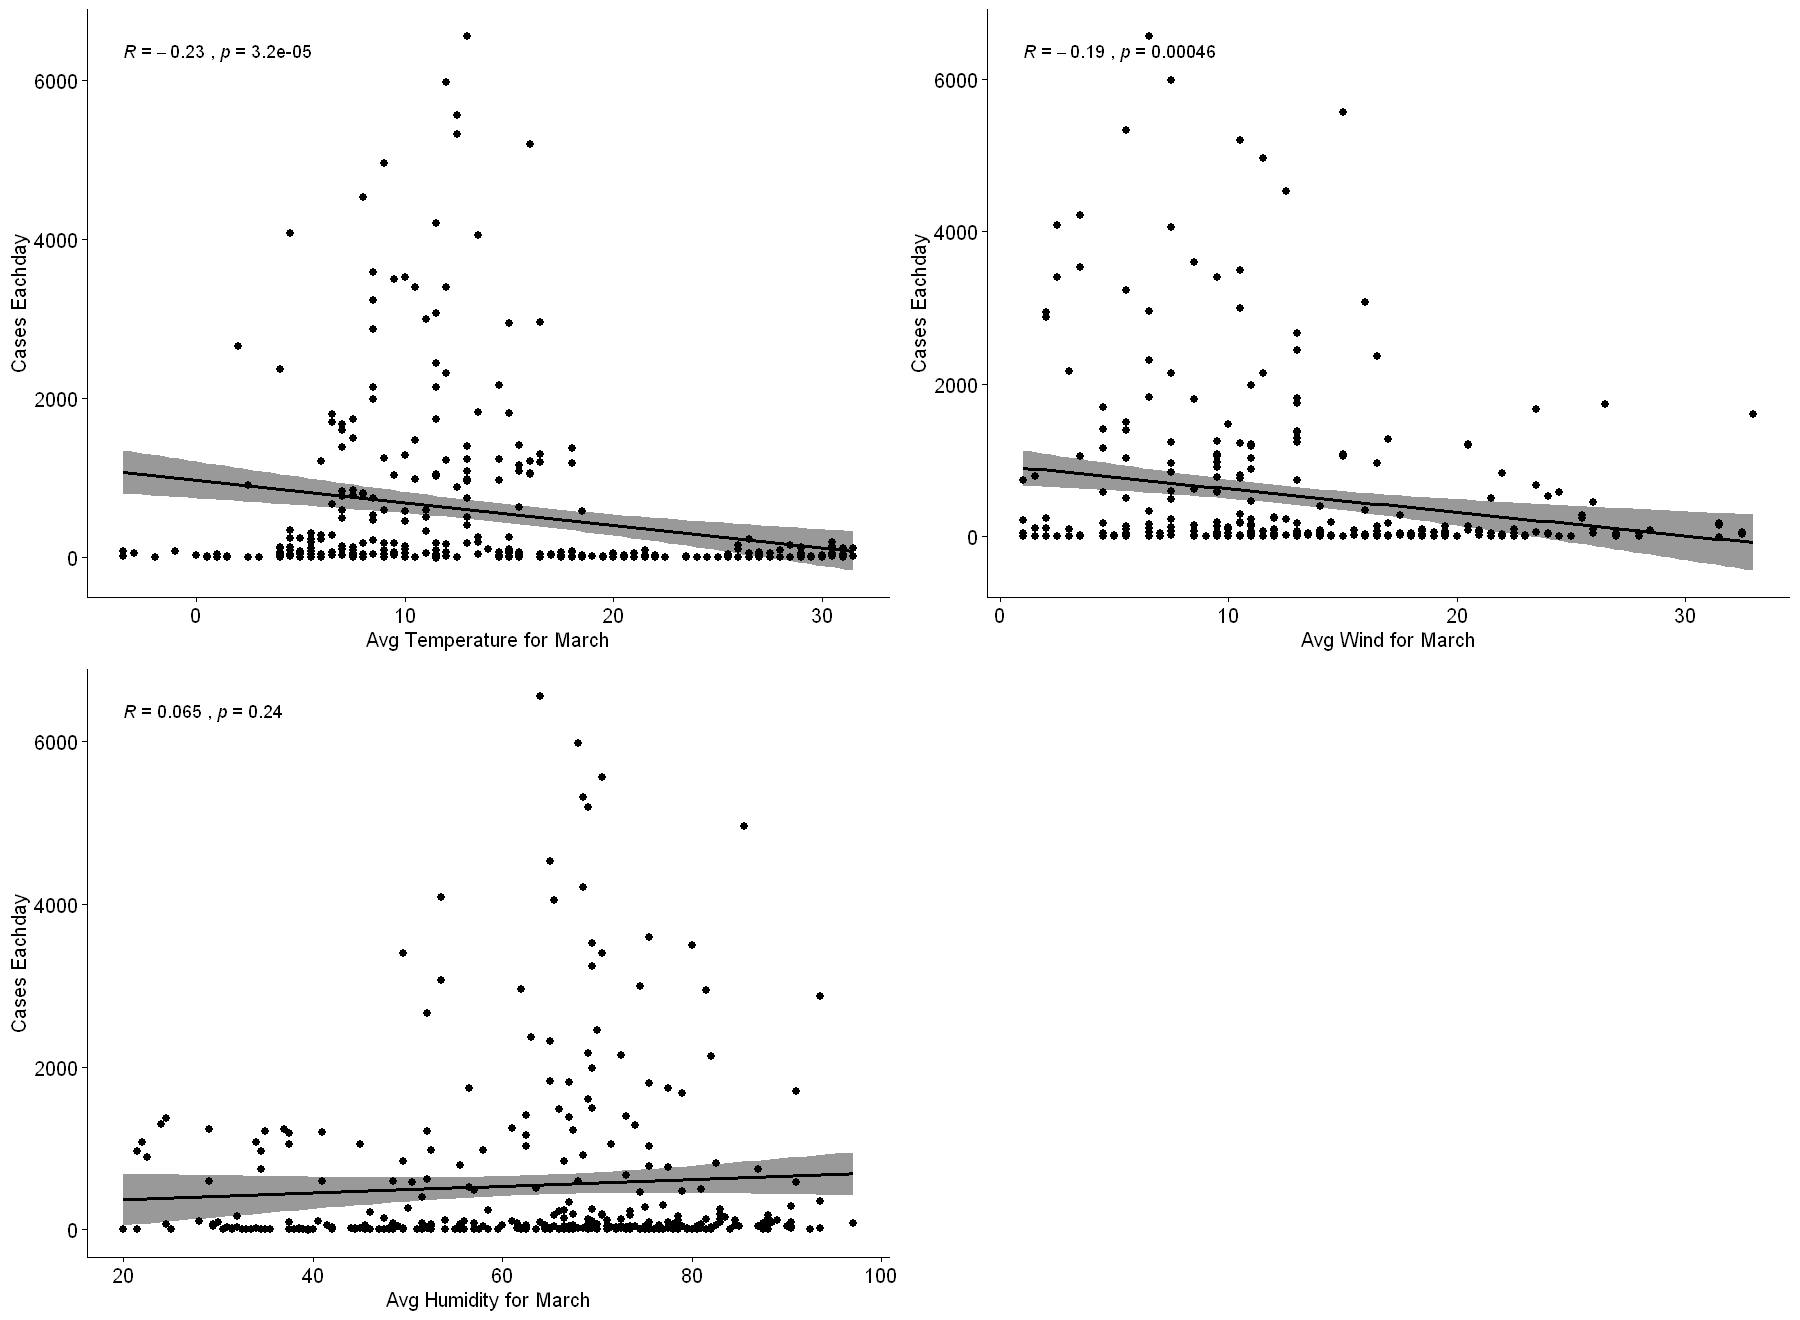

In [356]:
g2=ggscatter(analysis_dataset %>% filter((avg_wind<=70) & (avg_humidity<=120)), x = "avg_wind", y = "cases_that_day",color='black',
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Avg Wind for March", ylab = "Cases Eachday")

g1=ggscatter(analysis_dataset %>% filter((avg_wind<=70) & (avg_humidity<=120)), x = "avg_temp", y = "cases_that_day",color='black',
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Avg Temperature for March", ylab = "Cases Eachday")

g3=ggscatter(analysis_dataset %>% filter((avg_wind<=70) & (avg_humidity<=120)), x = "avg_humidity", y = "cases_that_day",color='black',
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Avg Humidity for March", ylab = "Cases Eachday")

options(repr.plot.width=15, repr.plot.height=11)
grid.arrange(g1,g2,g3,ncol=2)

Preliminary correlation tests shows that the correlation between "Spread" or "Number of New Cases Reported Eachday" and "Temperature" and "Wind" is significant, while the p-value for correlation test for Humidity shows not a significant correlation. The correlation of the spread with temperature and wind is both negative correlation which is "Weak to Mild" correlation.  Thus, i would further investigate this correlation between "Number of New Cases Eachday" and "Climatic Conditions" w.r.t each cluster, as within cluster correlations of climatic condition and cases eachday would matter to us, because this is the way we are going to design our experimental analysis.

Cluster 1 Countries and their Statistics:
---

In [448]:
data=analysis_dataset %>% filter(labels==1) %>% select(country,day,avg_wind,avg_temp,avg_humidity,cases_that_day)

summary(data %>% select(avg_temp,avg_wind,avg_humidity,cases_that_day))

    avg_temp         avg_wind      avg_humidity   cases_that_day   
 Min.   :-3.500   Min.   : 1.00   Min.   :29.50   Min.   : -14.00  
 1st Qu.: 6.000   1st Qu.: 7.50   1st Qu.:58.88   1st Qu.:  24.25  
 Median : 9.500   Median :12.00   Median :69.00   Median :  94.50  
 Mean   : 9.515   Mean   :13.52   Mean   :68.46   Mean   : 779.88  
 3rd Qu.:13.000   3rd Qu.:18.00   3rd Qu.:77.88   3rd Qu.: 960.25  
 Max.   :22.000   Max.   :94.50   Max.   :97.00   Max.   :6557.00  

In [313]:
unique(data['country'])

country
<chr>
Canada
France
Germany
Israel
Italy
Japan
Spain
Switzerland
USA


Let's look for the distribution of cases each day among different countries in this cluster.
---

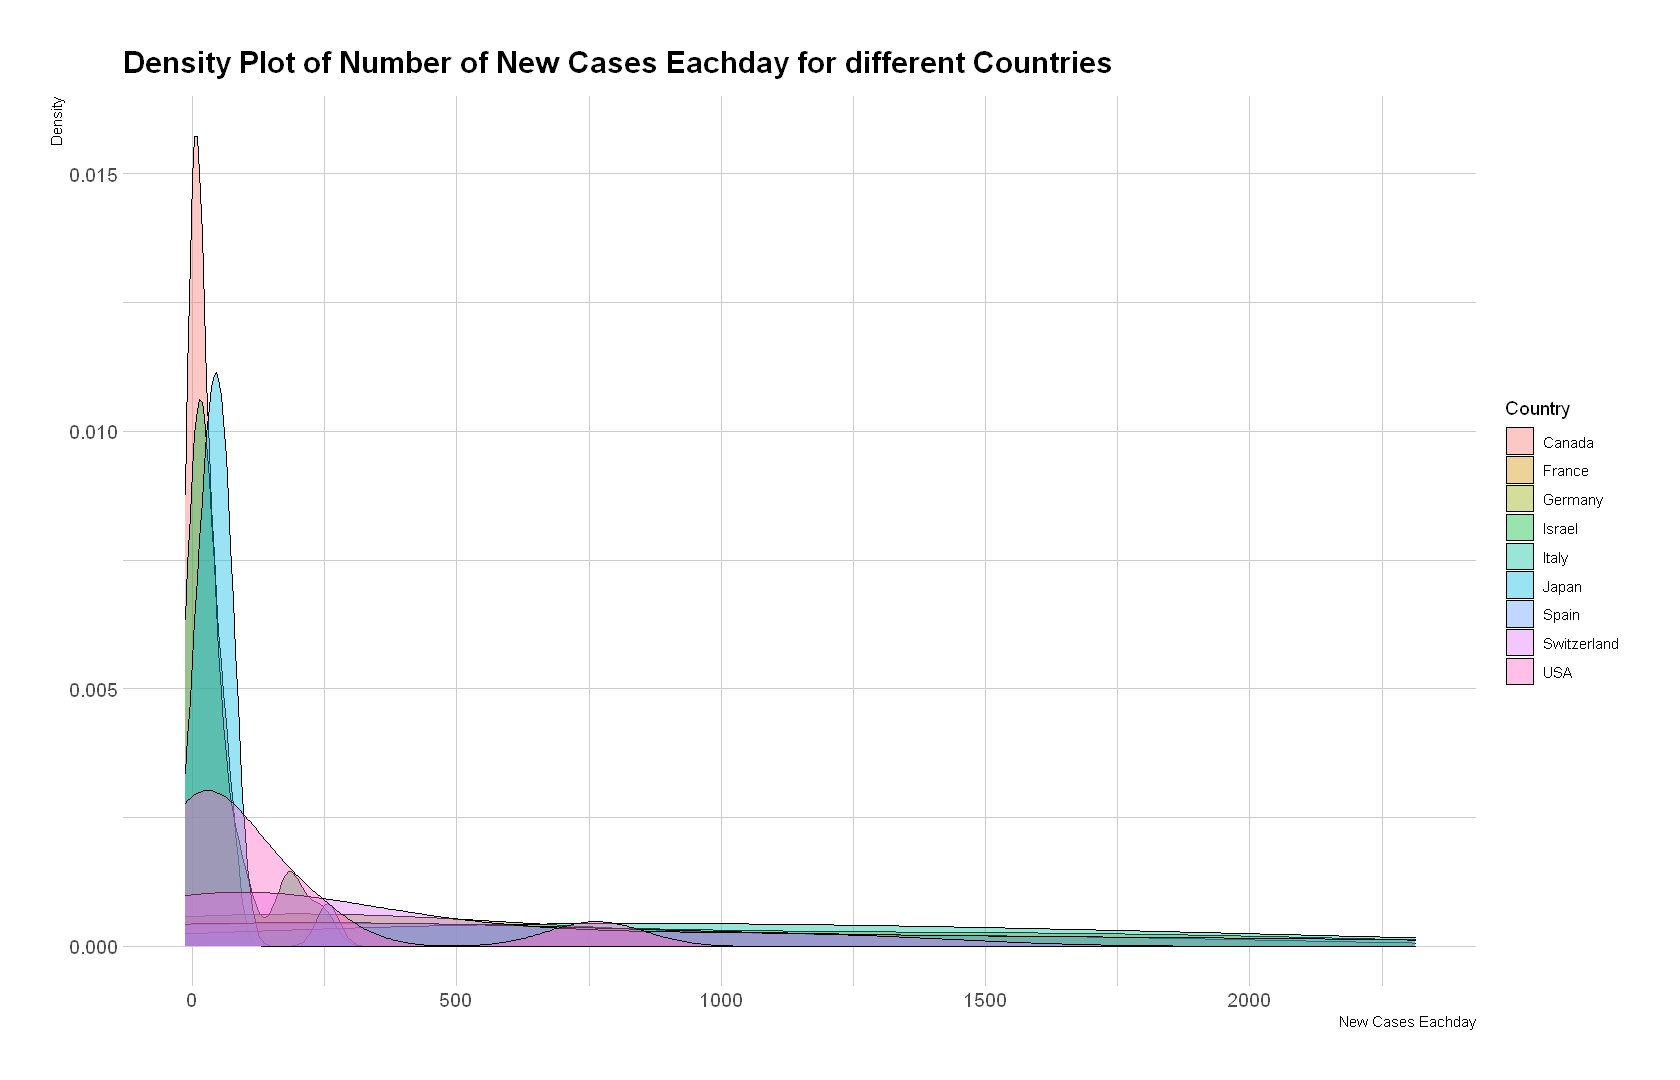

In [452]:
options(warn=-1)
data_new=data %>%
filter(cases_that_day<= quantile(cases_that_day,0.75)+1.5*(IQR(cases_that_day)))
options(repr.plot.width=14, repr.plot.height=9)
p2 <- ggplot(data=data_new, aes(x=cases_that_day, group=country, fill=country)) +
    geom_density(adjust=1.5, alpha=.4) +
    theme_ipsum() + labs(x='New Cases Eachday',y='Density',
                        title='Density Plot of Number of New Cases Eachday for different Countries',
                        fill='Country')

plot(p2)


So, the curve above shows that some countries have similar distributions of the Cases each day and some have a bit of a deviation. So, we can further see the results of these separately.

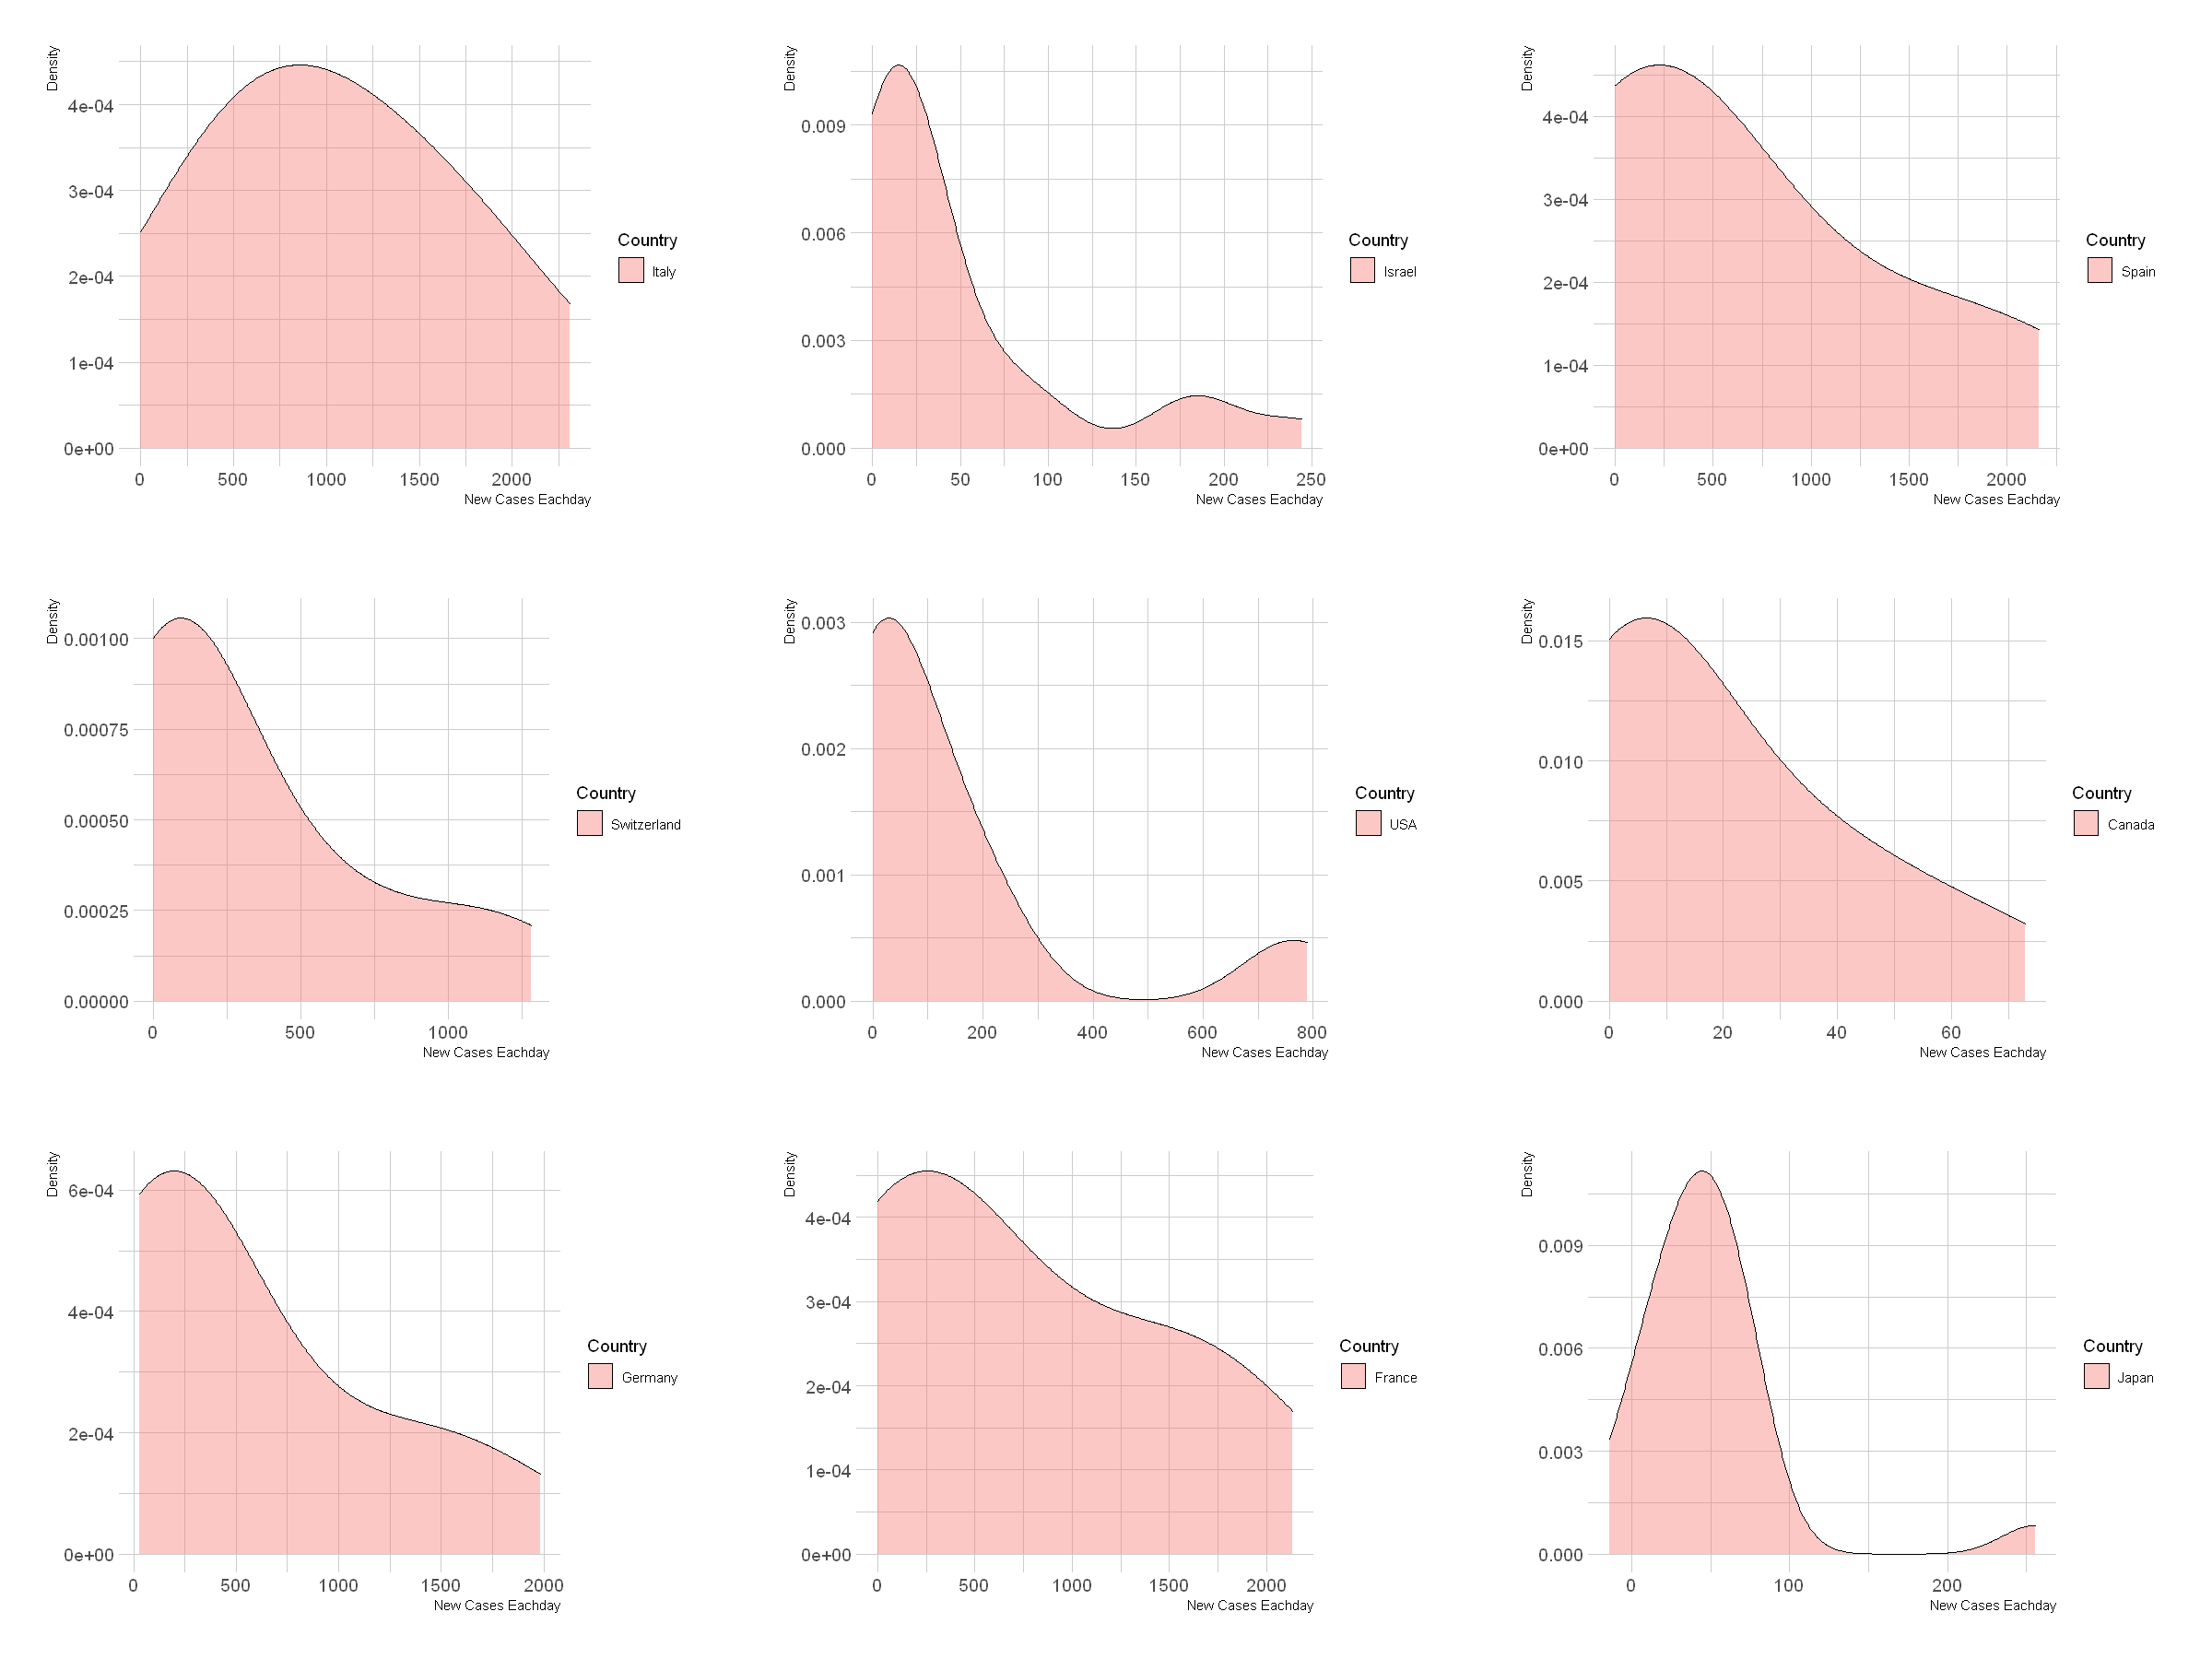

In [453]:
plot_func <- function(data,country_name){
    dats=data %>% filter(country==country_name) %>% select(country,cases_that_day)
    g= ggplot(data=dats, aes(x=cases_that_day,fill=country)) +
    geom_density(adjust=1.5, alpha=.4) +
    theme_ipsum()+
    labs(x='New Cases Eachday',y='Density',
                        fill='Country')
    return(g)
}

options(warn=-1)
options(repr.plot.width=20, repr.plot.height=15)

g1=plot_func(data_new,'Italy')
g2=plot_func(data_new,'Israel')
g3=plot_func(data_new,'Spain')
g4=plot_func(data_new,'Switzerland')
g5=plot_func(data_new,'USA')
g6=plot_func(data_new,'Canada')
g7=plot_func(data_new,'Germany')
g8=plot_func(data_new,'France')
g9=plot_func(data_new,'Japan')


grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,ncol=3)


# Note:
Now, its more evident from this graph that some countries have the same distribution of cases eachday (e.g Spain, USA, Switzerland) while some has different.
let's run statistical tests to see if there are significant differences in the distribution of Cases Eachday among different countries and if there are, then for which countries. For that we would run One Way Anova test.


# Statistical Testing:

Levenes Test:
---
Levene's Test to test the constant variance among groups as this is the condition for One Way Anova test.

In [316]:
leveneTest(cases_that_day ~ country, data = data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,8,11.95795,9.399528e-14
,189,NA,NA


Levene's test shows that the groups doesn't have constant variance so the simple Anova cannot be applied, however we can still resort to a non-parametric version of the One-Way Anova test called "Pairwise Wilcox Test".

PairWise Wilcox Test:
---

In [317]:
pairwise.wilcox.test(data$cases_that_day, data$country,
                     p.adjust.method = "BH")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  data$cases_that_day and data$country 

            Canada  France  Germany Israel  Italy   Japan   Spain   Switzerland
France      1.1e-05 -       -       -       -       -       -       -          
Germany     2.1e-06 0.39267 -       -       -       -       -       -          
Israel      0.19069 0.00012 8.5e-06 -       -       -       -       -          
Italy       2.1e-06 0.00150 0.00709 2.1e-06 -       -       -       -          
Japan       0.00984 0.00011 1.1e-05 0.20161 2.1e-06 -       -       -          
Spain       8.8e-06 0.36471 0.94386 5.9e-05 0.02201 0.00015 -       -          
Switzerland 0.00082 0.07307 0.01388 0.00984 3.5e-05 0.05993 0.02521 -          
USA         0.35836 0.11305 0.02521 0.48297 0.00021 0.36471 0.06266 0.51446    

P value adjustment method: BH 

As, anticipated we have some interesting results:
- USA has statistically significant difference with Only "Italy" and "Germany" and with the rest of the countries the there is no statistically significant difference of the distribution of cases eachday (spread). As, all these countries were controlled for same climatic conditions, but are different w.r.t "Demographics, Health and Economic Conditions" specially, USA, countries from Europe, Japan(Asia) and Israel(Middle East) having different conditions while climatic conditions are the same, and if they have the same distribution of Cases Eachday then this means climatic conditions have a big effect on the spread of Covid Cases.

- Next step can be that we can check the correlations between climatic conditions and cases eachday for these specific countries to see how and which of the different climatic conditions effect the number of cases eachday.

Checking the correlations between Cases Eachday and climatic conditions for this cluster as reference:
---

In [318]:
# Function for Plotting:
plot_function <- function(datu){
    g2=ggscatter(datu %>% filter((avg_wind<=70) & (avg_humidity<=120)), x = "avg_wind", y = "cases_that_day",color='black',
              add = "reg.line", conf.int = TRUE, 
              cor.coef = TRUE, cor.method = "spearman",
              xlab = "Avg Wind for March", ylab = "Cases Eachday")
    
    g1=ggscatter(datu %>% filter((avg_wind<=70) & (avg_humidity<=120)), x = "avg_temp", y = "cases_that_day",color='black',
              add = "reg.line", conf.int = TRUE, 
              cor.coef = TRUE, cor.method = "spearman",
              xlab = "Avg Temperature for March", ylab = "Cases Eachday")
    
    g3=ggscatter(datu %>% filter((avg_wind<=70) & (avg_humidity<=120)), x = "avg_humidity", y = "cases_that_day",color='black',
              add = "reg.line", conf.int = TRUE, 
              cor.coef = TRUE, cor.method = "spearman",
              xlab = "Avg Humidity for March", ylab = "Cases Eachday")
    return(list(g1,g2,g3))
}

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



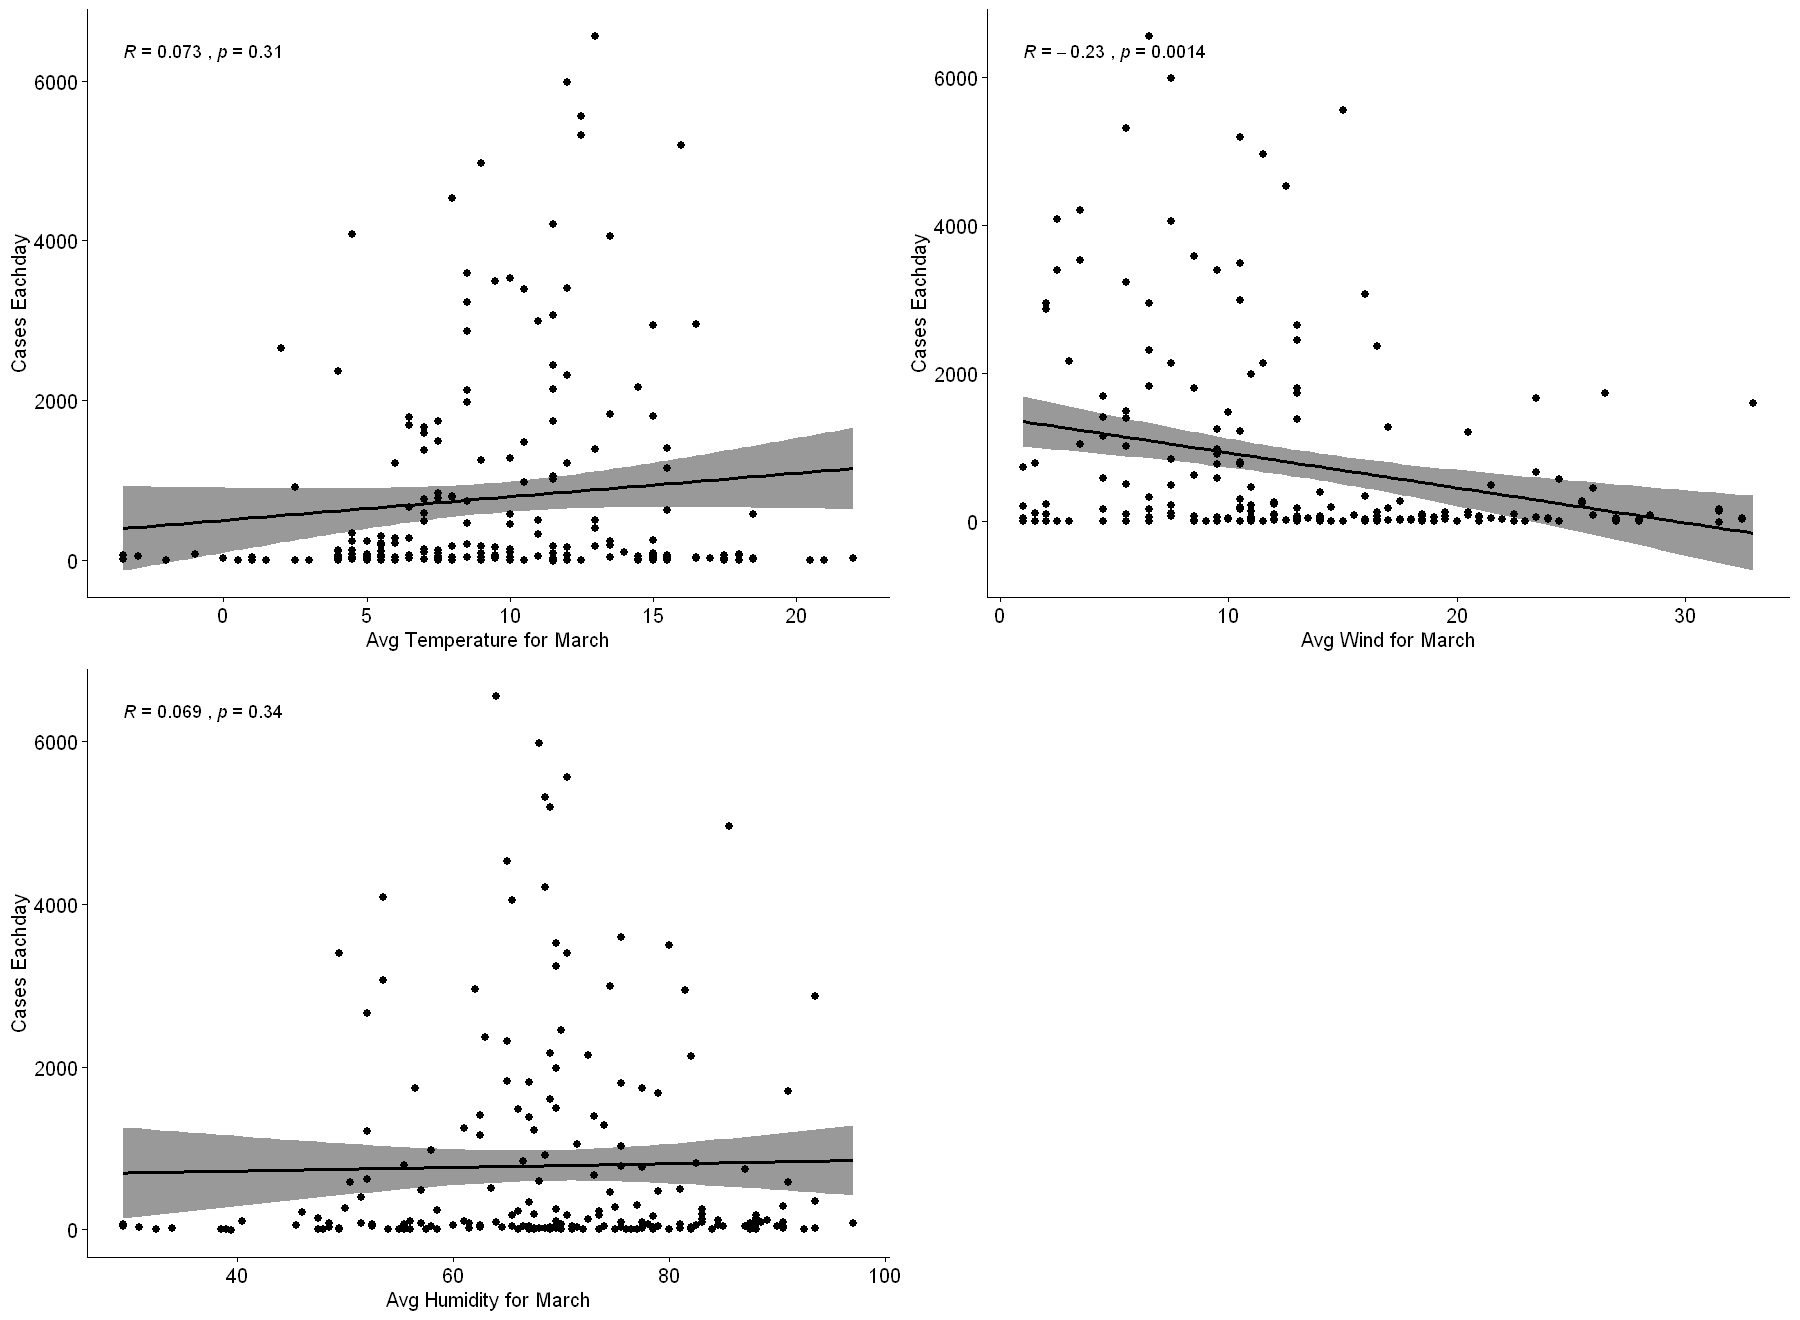

In [400]:
data=analysis_dataset %>% filter(labels==1) %>% select(avg_wind,avg_temp,avg_humidity,cases_that_day)

plotu=plot_function(data)
g1=plotu[[1]]
g2=plotu[[2]]
g3=plotu[[3]]

options(repr.plot.width=15, repr.plot.height=11)
grid.arrange(g1,g2,g3,ncol=2)


Findings:
---
Seems like for this cluster where Average Temperature is minimum as compared to other clusters, only the wind out of all the climatic conditions has an effect on the spread of the the cases in the countries which does not have any significant difference of the number of new cases added eachday, and that correlation is -0.23, a negative correlation, which means that wind in the countries where average temperature is low and they are a bit windy the spread is slower.

# Analysis on Cluster 2:

In [457]:
data=analysis_dataset %>% filter(labels==2)
unique(data$country)

[1] "Iran"     "Mexico"   "Pakistan"

In [395]:
summary(data %>% select(avg_temp,avg_wind,avg_humidity,cases_that_day))

    avg_temp        avg_wind      avg_humidity   cases_that_day  
 Min.   : 7.00   Min.   : 5.00   Min.   :20.00   Min.   :   0.0  
 1st Qu.:15.62   1st Qu.:11.00   1st Qu.:32.00   1st Qu.:   1.0  
 Median :19.50   Median :13.00   Median :37.75   Median :  27.0  
 Mean   :18.80   Mean   :13.48   Mean   :40.04   Mean   : 343.4  
 3rd Qu.:21.88   3rd Qu.:14.88   3rd Qu.:48.50   3rd Qu.: 812.0  
 Max.   :27.50   Max.   :26.00   Max.   :66.50   Max.   :1365.0  

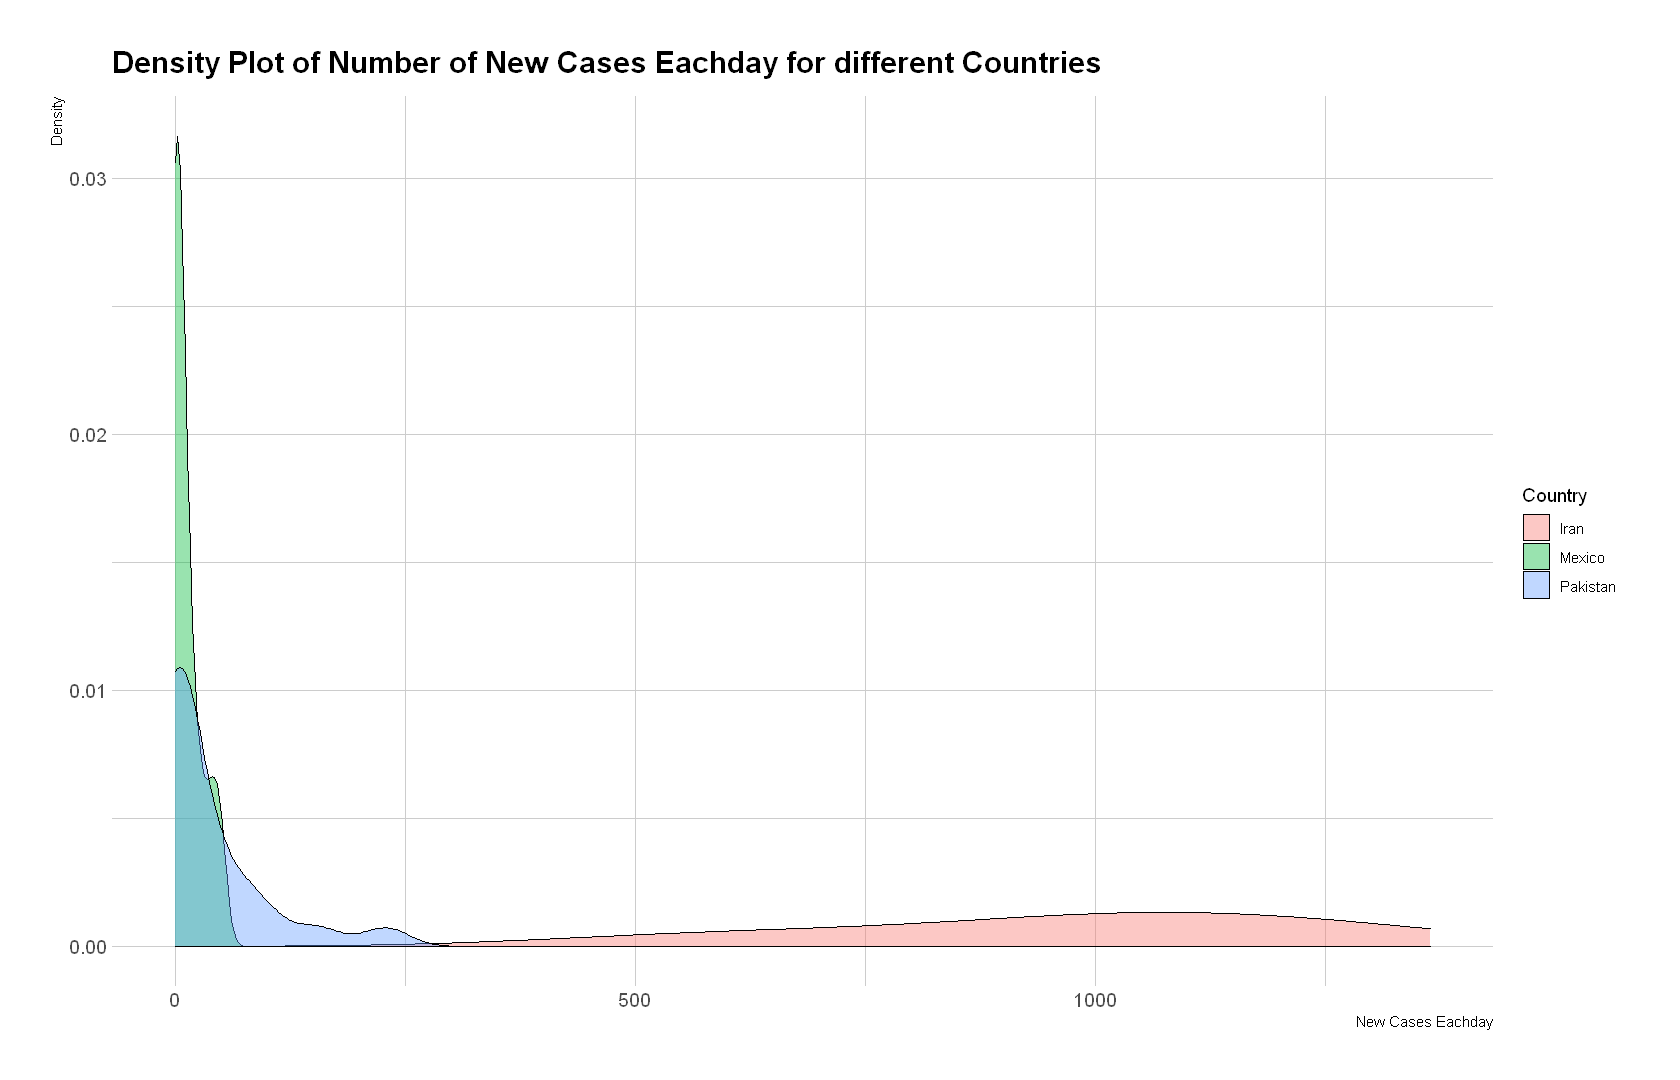

In [460]:
data=analysis_dataset %>% filter(labels==2)
options(warn=-1)
data_new=data %>%
filter(cases_that_day<= quantile(cases_that_day,0.75)+1.5*(IQR(cases_that_day)))

options(repr.plot.width=14, repr.plot.height=9)
p2 <- ggplot(data=data_new, aes(x=cases_that_day, group=country, fill=country)) +
    geom_density(adjust=1.5, alpha=.4) +
    theme_ipsum()+labs(x='New Cases Eachday',y='Density',
                        title='Density Plot of Number of New Cases Eachday for different Countries',
                        fill='Country')

plot(p2)

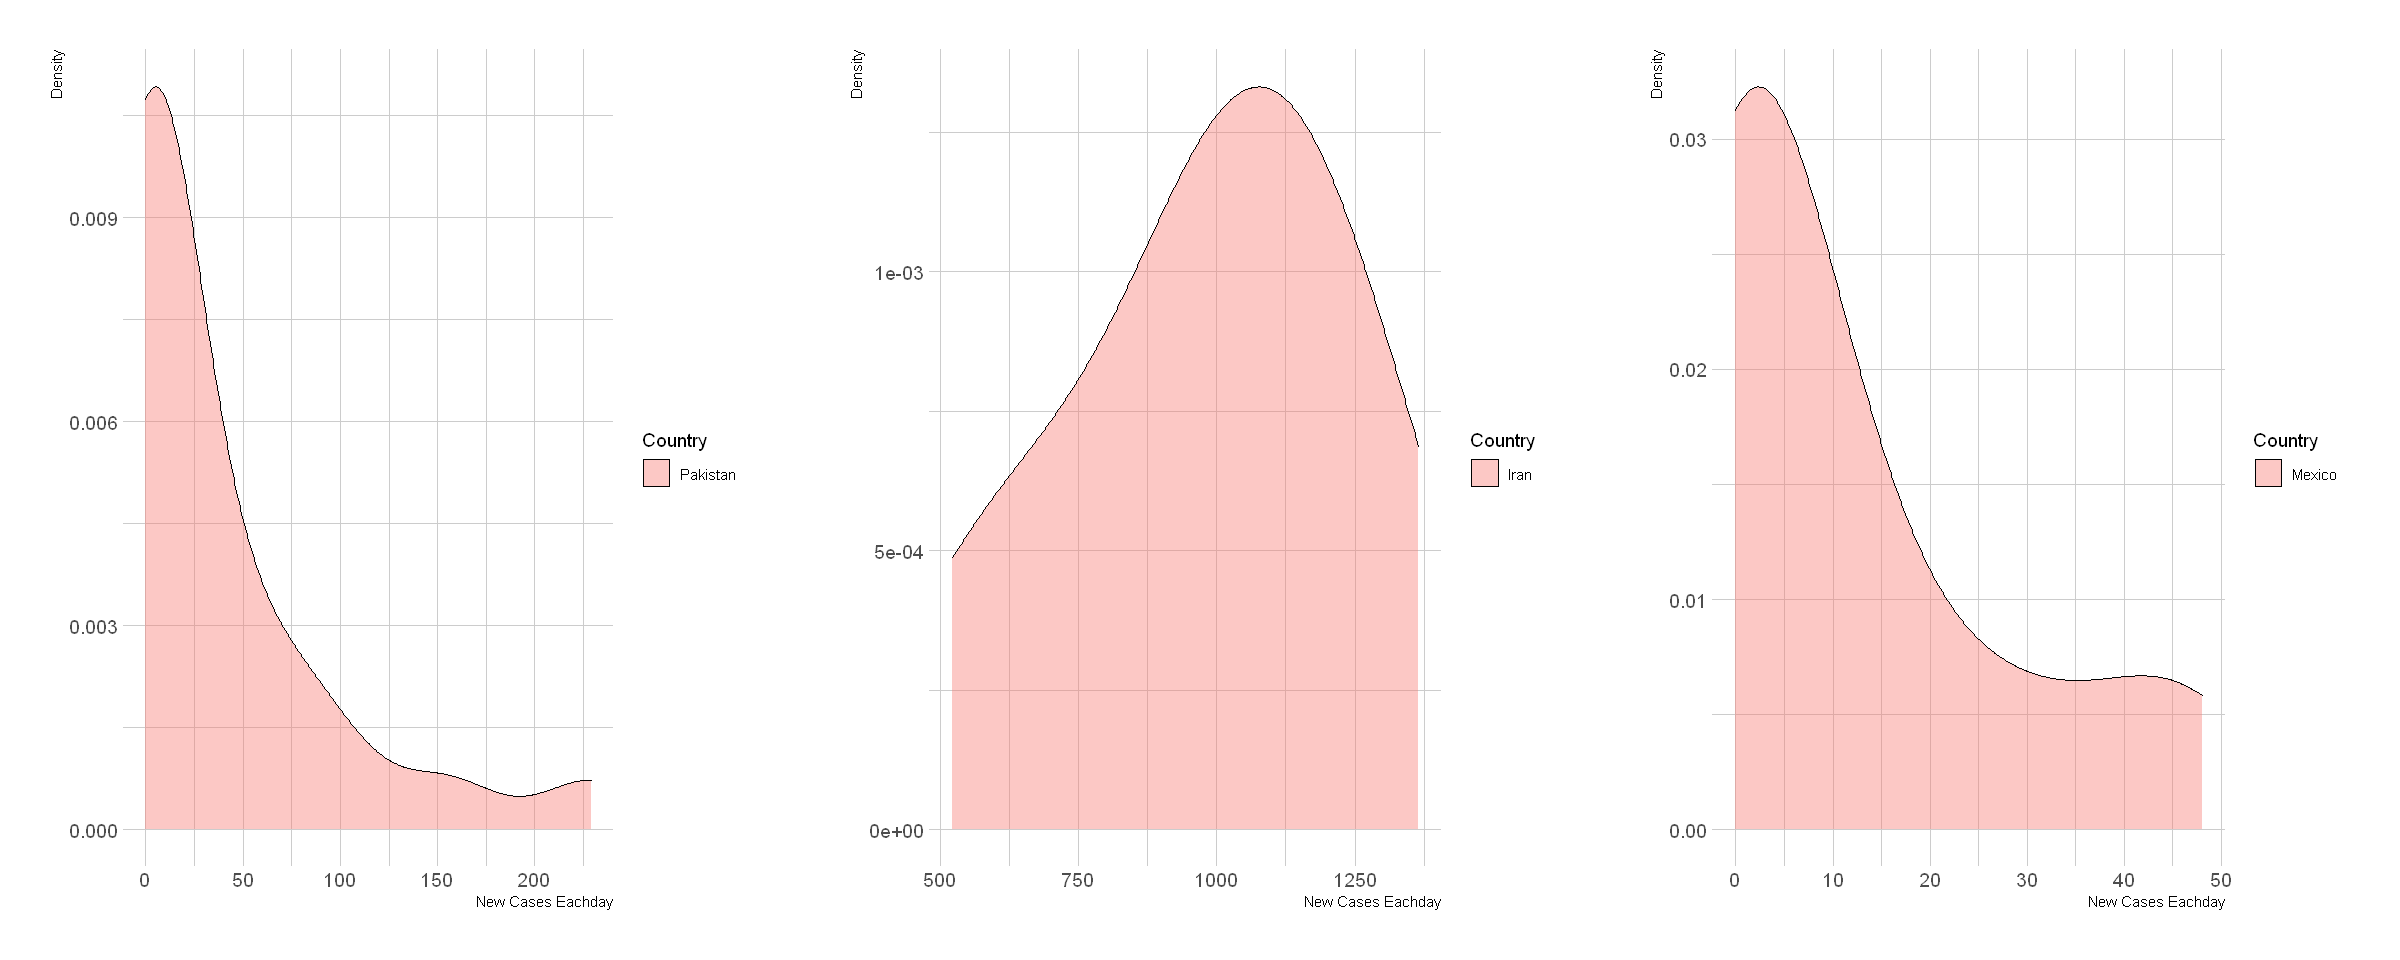

In [456]:
plot_func <- function(data,country_name){
    dats=data %>% filter(country==country_name) %>% select(country,cases_that_day)
    g= ggplot(data=dats, aes(x=cases_that_day,fill=country)) +
    geom_density(adjust=1.5, alpha=.4) +
    theme_ipsum()+labs(x='New Cases Eachday',y='Density',
                        fill='Country')
    return(g)
}

options(warn=-1)
options(repr.plot.width=20, repr.plot.height=8)

g1=plot_func(data_new,'Pakistan')
g2=plot_func(data_new,'Iran')
g3=plot_func(data_new,'Mexico')

grid.arrange(g1,g2,g3,ncol=3)

# Note:
So the density for Cases Eachday for Mexico and Pakistan seems close enough and it does'nt seem that there is any significant difference, whereas Iran's distribution of Cases Eachday is pretty different than Pakistan and Mexico, this maybe attributed to the sanctions imposed on Iran due to which the health system to tackle the spread of COVID was crippled, so let's check our intuition.

# Statistical Testing:
Levene's Test:
---

In [324]:
leveneTest(cases_that_day ~ country, data = data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,22.8479,3.455616e-08
,63,NA,NA


Levene's test shows that the groups doesn't have constant variance so the simple Anova cannot be applied, however we can still resort to a non-parametric version of the One-Way Anova test called "Pairwise Wilcox Test".

Pairwise Wilcox Test:
---

In [381]:
pairwise.wilcox.test(data$cases_that_day, data$country,
                     p.adjust.method = "BH")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  data$cases_that_day and data$country 

         Iran    Mexico
Mexico   2.1e-08 -     
Pakistan 2.1e-08 0.36  

P value adjustment method: BH 

1. Our intuition about Iran's distribution of Cases Each day being significantly different than the two countries is correct. 
2. We can see that Pakistan and Mexico being in totally different continents, having different healthcare and economic conditions except the weather conditions (which are the same as we controlled for them), shows that there is no significant difference between the Average Number of new Cases Eachday, shows that weather alongwith other latent factors is effecting the spread of COVID cases in the two countries. While the difference in Iran can be attributed to the extraordinary situation like Sanctions imposed on them, different economic status and healthcare conditions.
3. This shows that for Iran the other latent factors (Some of Which are mentioned above e.g Economic and Healthcare conditions) are overpowering the Climatic Conditions as a cause in effecting the spread of COVID-19 cases. 

Next step can be that we can check the correlations between climatic conditions and cases eachday for these specific countries to see how and which of the different climatic conditions effect the number of cases eachday.

Checking the correlations between Cases Eachday and climatic conditions for countries in this cluster:
---

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



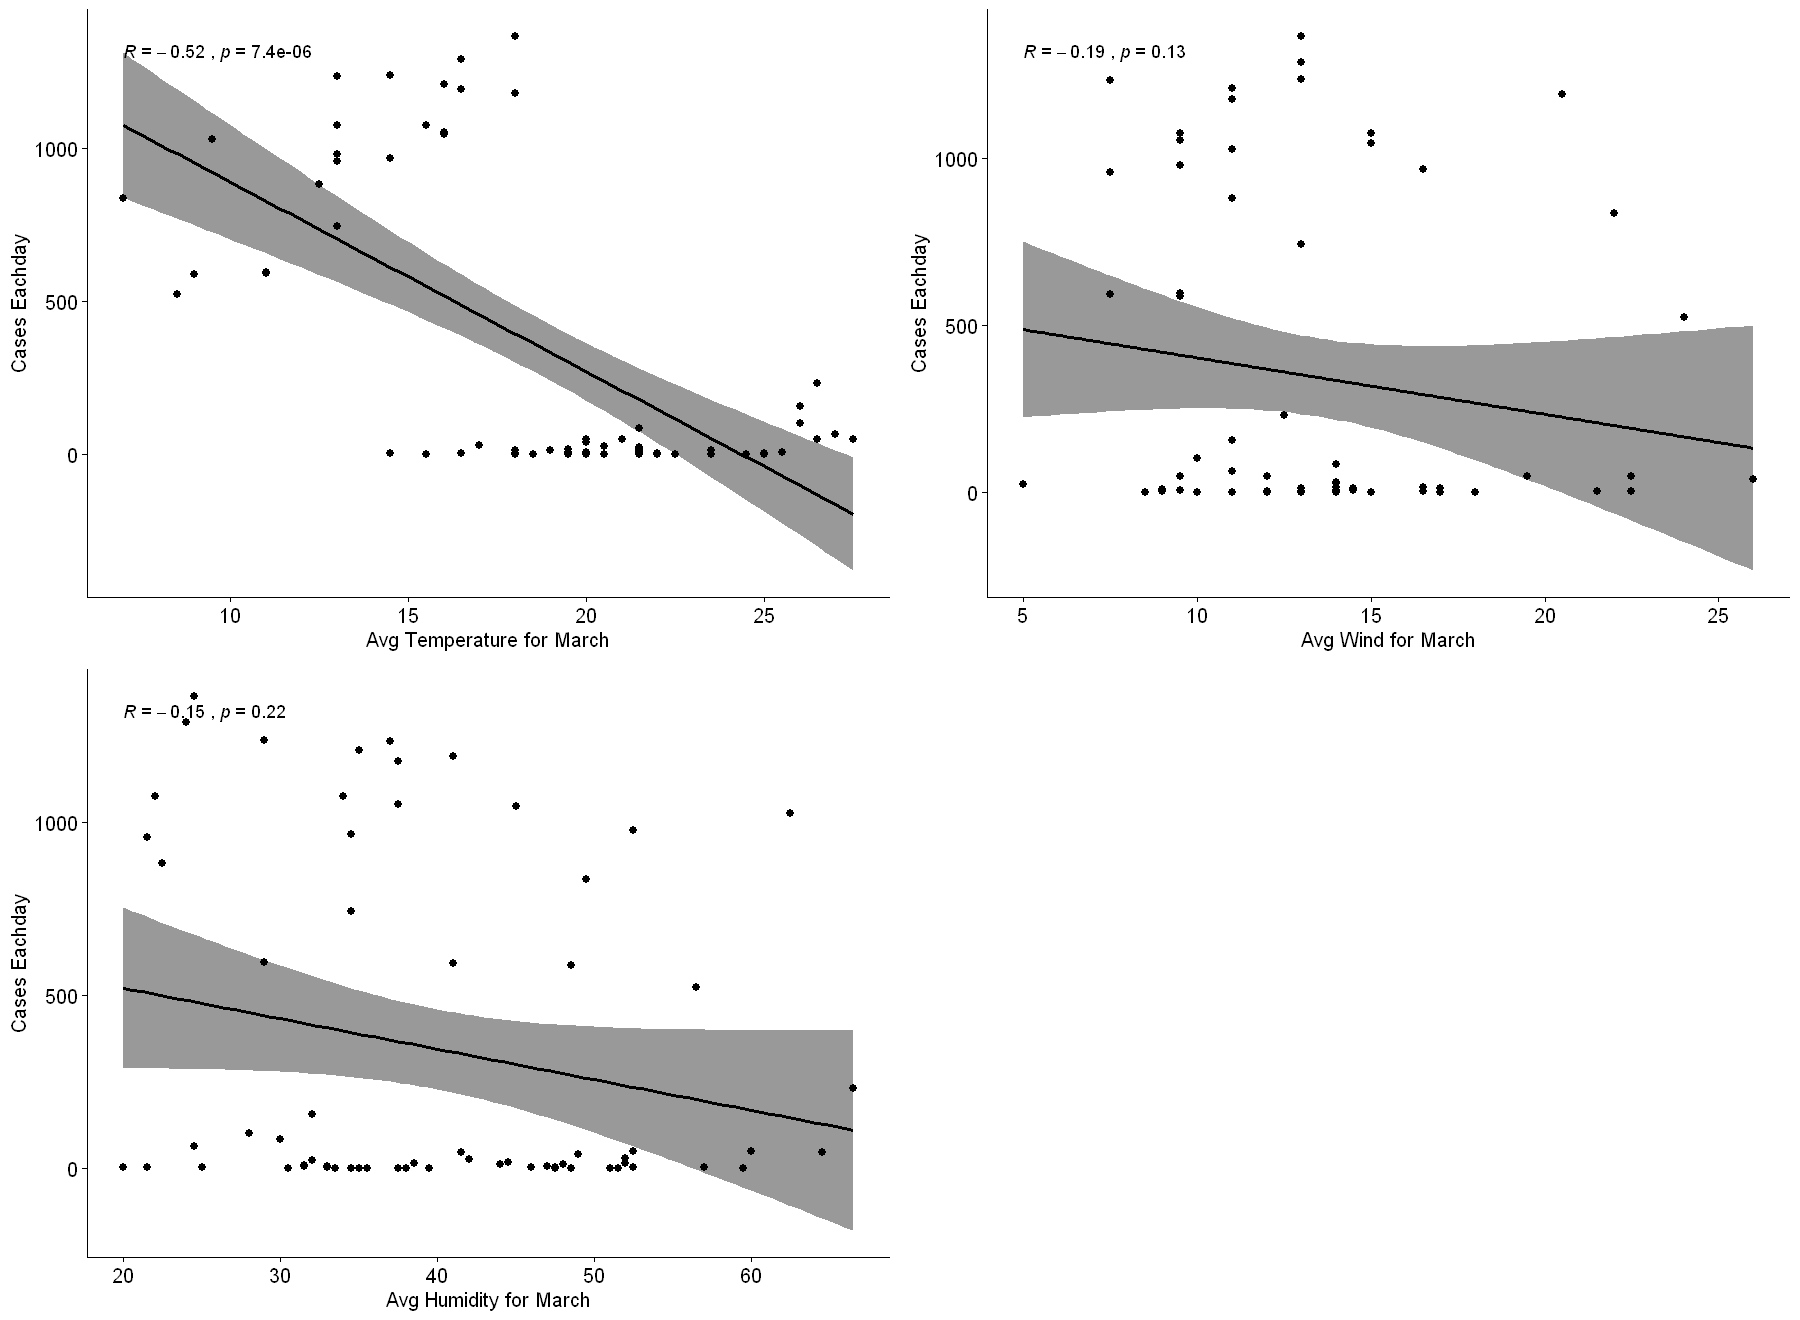

In [382]:
data=data %>% select(avg_wind,avg_temp,avg_humidity,cases_that_day)

plotu=plot_function(data)
g1=plotu[[1]]
g2=plotu[[2]]
g3=plotu[[3]]

options(repr.plot.width=15, repr.plot.height=11)
grid.arrange(g1,g2,g3,ncol=2)


Findings:
---
Seems like for this cluster where Average Temperature is moderate as it is higher from the average temperature for cluster 1 and lower than that of cluster 3, only the Temperature out of all the climatic conditions has an effect on the spread of the the cases in the countries which does not have any significant difference of the number of new cases added eachday, and temperature has a negative correlation of -0.52 with the New Cases Eachday, which shows that for countries like "Pakistan" and "Panama" (which does'nt have any significant difference of the number of new cases added eachday) the increase in temperature would slow down the spread of COVID-19.

# Analysis  on Cluster 3:

In [461]:
data=analysis_dataset %>% filter(labels==3)
unique(data$country)

[1] "Dominican Republic" "Malaysia"           "Panama"

In [397]:
summary(data %>% select(avg_temp,avg_wind,avg_humidity,cases_that_day))

    avg_temp        avg_wind      avg_humidity   cases_that_day  
 Min.   :23.50   Min.   : 2.50   Min.   :37.50   Min.   :  0.00  
 1st Qu.:27.00   1st Qu.: 5.50   1st Qu.:63.75   1st Qu.:  0.00  
 Median :29.00   Median : 9.50   Median :69.00   Median :  7.00  
 Mean   :28.35   Mean   :10.37   Mean   :68.12   Mean   : 26.56  
 3rd Qu.:29.50   3rd Qu.:14.00   3rd Qu.:76.50   3rd Qu.: 28.75  
 Max.   :31.50   Max.   :25.00   Max.   :83.50   Max.   :190.00  

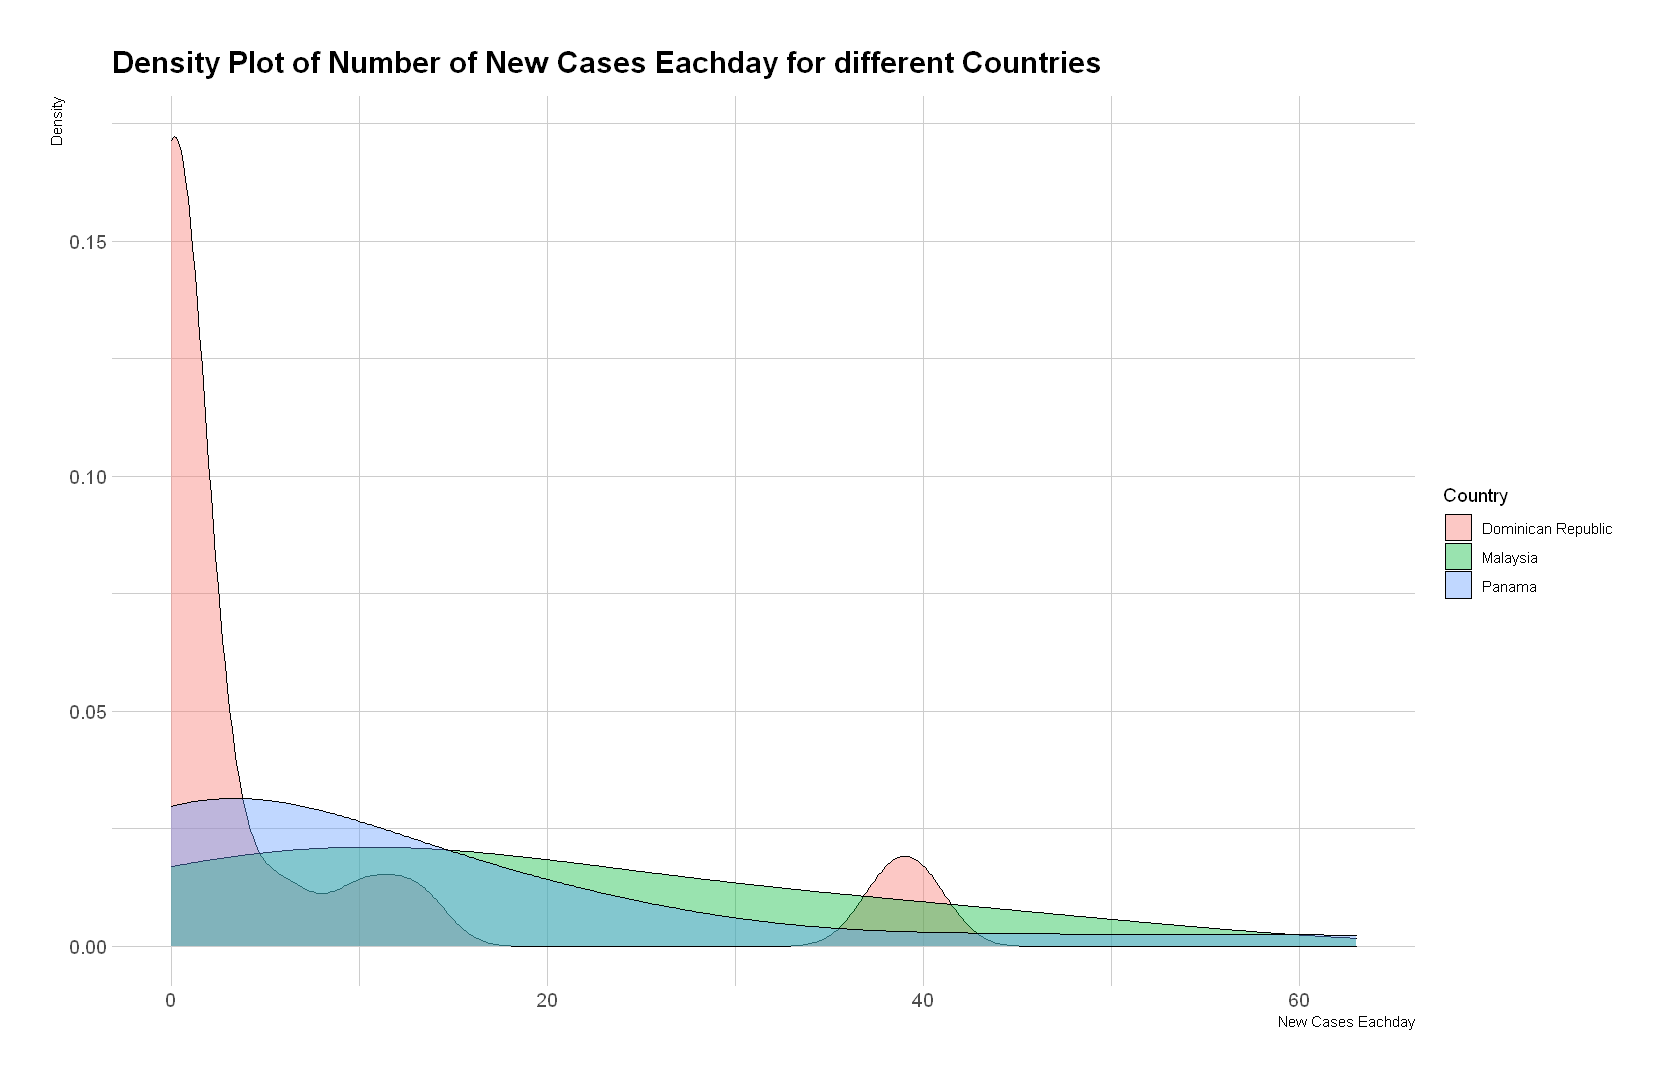

In [462]:
options(warn=-1)
data_new=data %>%
filter(cases_that_day<= quantile(cases_that_day,0.75)+1.5*(IQR(cases_that_day)))

options(repr.plot.width=14, repr.plot.height=9)
p2 <- ggplot(data=data_new, aes(x=cases_that_day, group=country, fill=country)) +
    geom_density(adjust=1.5, alpha=.4) +
    theme_ipsum()+labs(x='New Cases Eachday',y='Density',
                        title='Density Plot of Number of New Cases Eachday for different Countries',
                        fill='Country')

plot(p2)

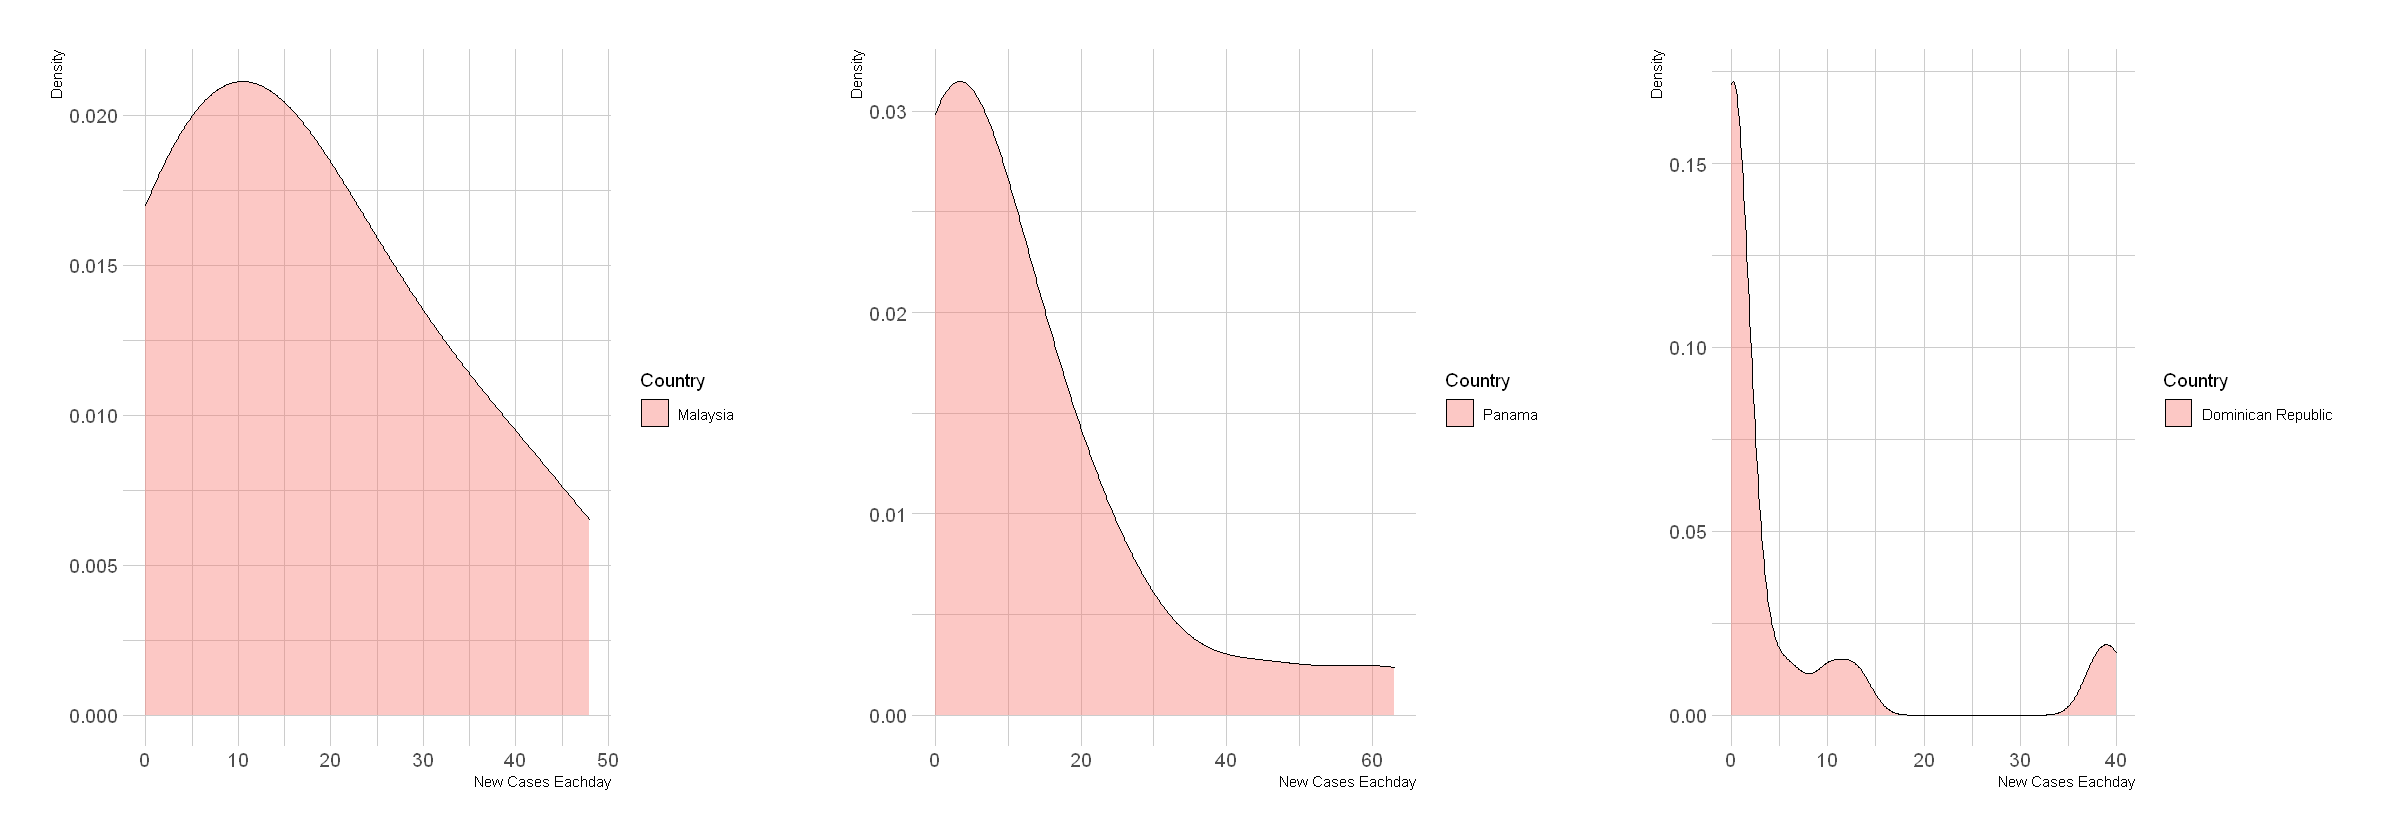

In [465]:
plot_func <- function(data,country_name){
    dats=data %>% filter(country==country_name) %>% select(country,cases_that_day)
    g= ggplot(data=dats, aes(x=cases_that_day,fill=country)) +
    geom_density(adjust=1.5, alpha=.4) +
    theme_ipsum()+labs(x='New Cases Eachday',y='Density',
                        fill='Country')
    return(g)
}

options(warn=-1)
options(repr.plot.width=20, repr.plot.height=7)

g1=plot_func(data_new,'Malaysia')
g2=plot_func(data_new,'Panama')
g3=plot_func(data_new,'Dominican Republic')

grid.arrange(g1,g2,g3,ncol=3)

Note:
---
Here it seems like Malaysia and Panama follow the same distribution of Cases Eachday while there seems to be a small difference in the distribution of Cases Eachday for these mentioned countries with the Dominican Republic, but this difference doesnt seem to be that significant. Let's check this intuition with statistical testing.

# Statistical Testing:
Levene's Test:
---

In [360]:
leveneTest(cases_that_day ~ country, data = data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,12.40495,2.868197e-05
,63,NA,NA


Levene's test shows that the groups doesn;t have constant variance so the simple Anova cannot be applied, however we can still resort to a non-parametric version of the One-Way Anova test called "Pairwise Wilcox Test".

In [385]:
pairwise.wilcox.test(data$cases_that_day, data$country,
                     p.adjust.method = "BH")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  data$cases_that_day and data$country 

         Dominican Republic Malaysia
Malaysia 0.00039            -       
Panama   0.19619            0.00283 

P value adjustment method: BH 

Thus, the results above show that the Panama and Dominican Republic does not have ay significant difference in the average new cases recorded per day values, while Malaysia shows significant difference from both these countries.
So, what could be the reasons:
1. As, we controlled for the Climatic Conditions, the test shows that climatic conditions in Panama and Dominican Republic effect the spread of COVID-19, this thing might also be caused by the fact that geo-graphically both are in the same region and have similar economic structure. So, these factors can also contribute aswell along with the Climatic Conditions as shown.
2. Malaysia shows that despite the same climatic conditions, the number of new cases per day are significantly different than that of the rest of the two countries. Now, this could be caused due to several reasons. The difference is the geographical differences. So, far with this analysis we can say that for Malaysia the Climatic Conditions are overpowered by other factors as discussed in effecting the spread of COVID-19 cases.

Next step can be that we can check the correlations between climatic conditions and cases eachday for these specific countries to see how and which of the different climatic conditions effect the number of cases eachday.

Checking the correlations between Cases Eachday and climatic conditions for Countries in this Cluster:
---

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



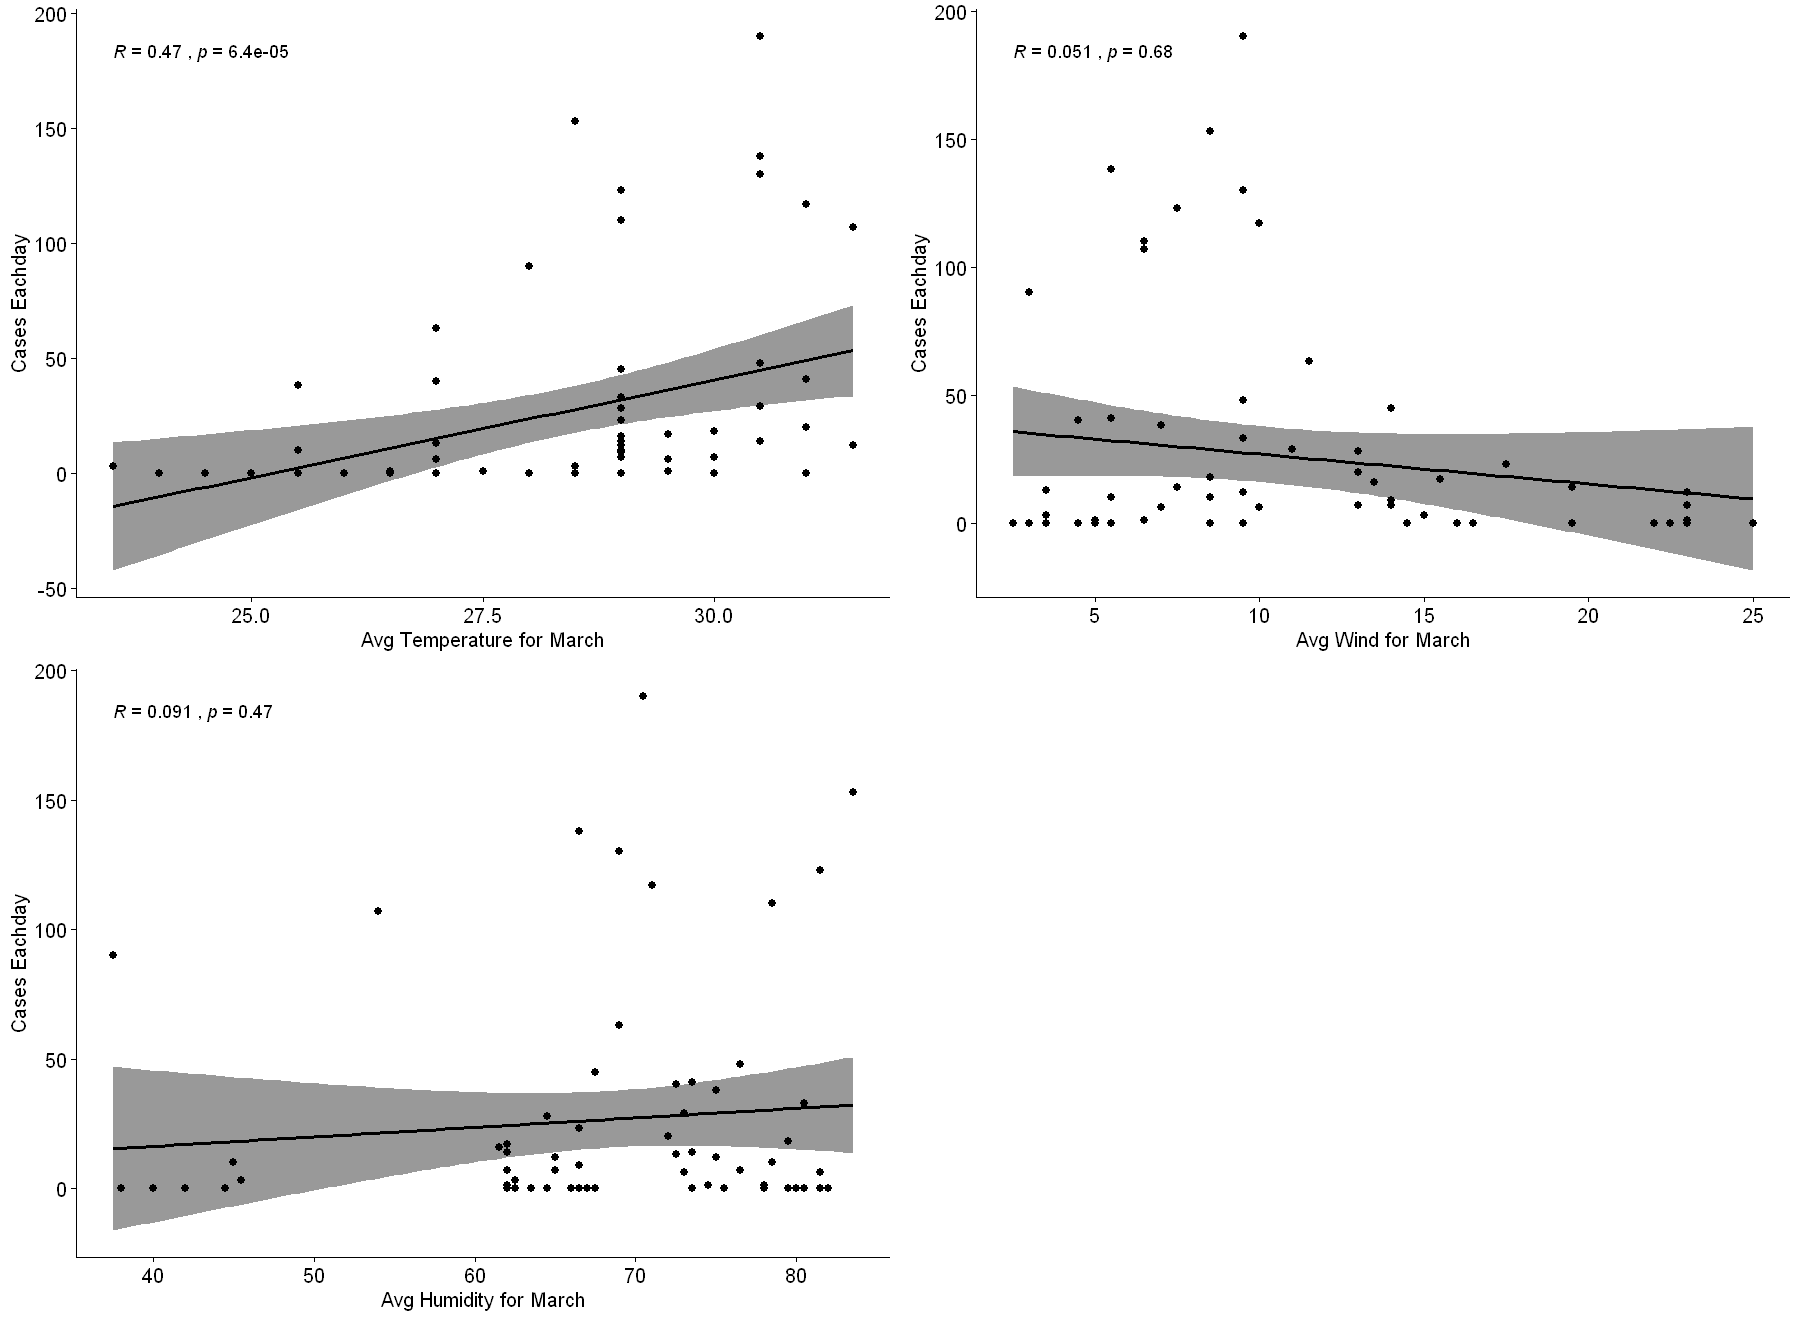

In [386]:
datu=data %>% select(avg_wind,avg_temp,avg_humidity,cases_that_day)

plotu=plot_function(datu)
g1=plotu[[1]]
g2=plotu[[2]]
g3=plotu[[3]]

options(repr.plot.width=15, repr.plot.height=11)
g=grid.arrange(g1,g2,g3,ncol=2)

Findings:
---
The above plots show that out of the three climatic conditions only temperature is significantly correlated with the New Cases Eachday for the three countries in this cluster. The correlation is positive and is moderate with the value of 0.47. This means that increase in temperature for countries (Only those countries that has Climatic Conditions as statistically proven contributing cause in the spread of COVID-19, which in this case is Panama and Dominican Republic) in this cluster would help the spread of COVID-19 and increase the number of cases.

In [408]:
cor(analysis_dataset %>% filter(labels==3) %>% select(avg_wind,avg_temp,avg_humidity))

,avg_wind,avg_temp,avg_humidity
avg_wind,1.00000000,0.4203301,-0.03525524
avg_temp,0.42033007,1.0000000,0.18951925
avg_humidity,-0.03525524,0.1895193,1.00000000


# Conclusion:
- Humidity has no effect towards the spread of COVID-19 as the correlation of Humidity and Cases Each day is insignificant for all countries in the 3 clusters. Also there is "no" synergy effect detected where humidity shows strong correlation with any of the other climatic conditions like "Wind or Temperature" when wind or temperature has a significant correlation with the Cases Eachday.

In [416]:
# Cluster 1:
cat("Climatic Conditions Correlation Analysis for Cluster 1\n")
print(cor(analysis_dataset %>% filter(labels==1) %>% select(avg_wind,avg_temp,avg_humidity)))

# Cluster 2:
cat("\nClimatic Conditions Correlation Analysis for Cluster 2\n")
print(cor(analysis_dataset %>% filter(labels==2) %>% select(avg_wind,avg_temp,avg_humidity)))

# Cluster 3:
cat("\nClimatic Conditions Correlation Analysis for Cluster 3\n")
print(cor(analysis_dataset %>% filter(labels==3) %>% select(avg_wind,avg_temp,avg_humidity)))

Climatic Conditions Correlation Analysis for Cluster 1
                avg_wind   avg_temp avg_humidity
avg_wind      1.00000000 -0.0863325  -0.04072747
avg_temp     -0.08633250  1.0000000  -0.15674913
avg_humidity -0.04072747 -0.1567491   1.00000000

Climatic Conditions Correlation Analysis for Cluster 2
               avg_wind     avg_temp avg_humidity
avg_wind     1.00000000 0.0461823865 0.2023280260
avg_temp     0.04618239 1.0000000000 0.0009418376
avg_humidity 0.20232803 0.0009418376 1.0000000000

Climatic Conditions Correlation Analysis for Cluster 3
                avg_wind  avg_temp avg_humidity
avg_wind      1.00000000 0.4203301  -0.03525524
avg_temp      0.42033007 1.0000000   0.18951925
avg_humidity -0.03525524 0.1895193   1.00000000


- The only synergy effect we could observe is in the third cluster, where Temperature is the only significantly correlated factor with Cases Eachday, but it has a moderately positive correlation with Wind. Thus, in this cluster as temperature increases, the wind would increase as well and that would lead to the increase in number of new cases.

- Final point is that as we move from low average temperature countries to high average temperature countries the temperature becomes a significant cause and eventually start effecting the spread in a positive manner, which means the correlation becomes positive as we saw. For 2nd cluster where the average temperature is 18 degrees, the temperature is negatively correlated with Cases, while for third cluster the average temperature is 29 degree celsius the temperature develops a positive correlation with the cases. This maybe caused because in high temperature countries, the wind is high so if high temperature can cause High wind to occur that might induce a positive correlation between the Temperature and Cases.

# Limitations and Ending Notes: 
- All this analysis is based on data that has been gathered from only 15 cities in a specific country. It has also been collected for the month of March. So there can be multiple omitted vairables that have not been taken into consideration.
- To any reader, this is a very humble attempt to use my Analytical and Statistical skills to try and answer some of the questions that i found intriguing during this COVID-19 Pandemic. There could be tons of other latent factors like Social Status, Age, Strategic Decision Making, Healthcare Conditions, Economic Status etc. that could also effect the spread of COVID-19 cases. My attempt is just to showcase that if climatic conditions were a contributing cause towards the Spread of COVID Cases.